In [110]:
#load in packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import contextily as cx
import warnings
import geoplot as gplt
import geoplot.crs as gcrs
from numpy import log10
import os
from shapely.geometry.point import Point
import matplotlib.cbook as cbook
from matplotlib.gridspec import GridSpec

#Allow full display of columns in data
pd.set_option("display.max_columns", 100,"display.max_rows",100)

In [9]:
#Read in dpdcalls data set
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [87]:
dpdcalls.head()

Event Numb Case Numbe Call Date   Call Time             Source Priority  \
0    21000002       None  1/1/2021  12:00:28AM  Wireless 911 Call        3   
1    21000006       None  1/1/2021  12:01:41AM  Wireless 911 Call        3   
2    21000007       None  1/1/2021  12:01:45AM  Wireless 911 Call        3   
3    21000008       None  1/1/2021  12:02:10AM  Wireless 911 Call        3   
4    21000010       None  1/1/2021  12:02:39AM  Wireless 911 Call        3   

           Nature                  Address        X       Y District Beat  \
0  SOUND OF SHOTS       100 PEBBLESTONE DR  2055372  818537       D1  121   
1  SOUND OF SHOTS  CARROLL ST/MOREHEAD AVE  2024961  815902       D3  312   
2  SOUND OF SHOTS           1300 SHILEY DR  2038061  841530       D2  223   
3  SOUND OF SHOTS          0 EDGEBROOK CIR  2045947  796806       D4  414   
4  SOUND OF SHOTS             1200 ALMA ST  2037016  818259       D1  112   

                Dispositio  Cancelled                    geometry  
0  Resolved Without Report          0  POINT (-78.81280 35.99886)  
1  Resolved Without Report          0  POINT (-78.91562 35.99174)  
2  Resolved Without Report          0  POINT (-78.87123 36.06210)  
3  Resolved Without Report          0  POINT (-78.84478 35.93921)  
4  Resolved Without Report          0  POINT (-78.87486 35.99818)

In [10]:
#Read in policebeats data set
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [659]:
#Print .info() for policebeats
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    119 non-null    int64   
 1   PERIMETER   119 non-null    float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     119 non-null    object  
 5   LAWBEAT     119 non-null    int64   
 6   CAD         119 non-null    object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  119 non-null    float64 
 9   ShapeSTLen  119 non-null    float64 
 10  geometry    119 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 10.4+ KB


In [660]:
#Print .info() for dpdcalls
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [661]:
#Print null values with df.isna().sum() function
dpdcalls.isna().sum()

Event Numb         0
Case Numbe    285123
Call Date          0
Call Time          0
Source             0
Priority         652
Nature             1
Address          640
X                  0
Y                  0
District       11743
Beat           11762
Dispositio         0
Cancelled          0
geometry           0
dtype: int64

In [11]:
#Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

Event Numb Case Numbe   Call Date   Call Time          Source  \
127       21000194       None    1/1/2021   1:25:25AM  Self Initiated   
131       21000199       None    1/1/2021   1:29:04AM  Self Initiated   
210       21000322       None    1/1/2021   3:56:22AM  Self Initiated   
255       21000381       None    1/1/2021   6:14:49AM  Self Initiated   
274       21000409       None    1/1/2021   7:03:23AM  Self Initiated   
...            ...        ...         ...         ...             ...   
330699    21477803   21045233  12/31/2021   6:00:48PM           Mobil   
330858    21478039       None  12/31/2021   8:24:41PM  Self Initiated   
330963    21478179       None  12/31/2021  10:06:37PM  Self Initiated   
331057    21478324       None  12/31/2021  11:45:43PM  Self Initiated   
331071    21478346       None  12/31/2021  11:54:20PM  Self Initiated   

       Priority             Nature  \
127           4  ATTEMPT TO LOCATE   
131           4  ATTEMPT TO LOCATE   
210           5    DIRECTED PATROL   
255           4  ATTEMPT TO LOCATE   
274           4          FOLLOW UP   
...         ...                ...   
330699        4  ATTEMPT TO LOCATE   
330858        4  ATTEMPT TO LOCATE   
330963        4     PROPERTY CHECK   
331057        4  ATTEMPT TO LOCATE   
331071        4  ATTEMPT TO LOCATE   

                                                  Address  X  Y District  \
127                    CARELESS AND RECKLESS AT 11 147 NB  0  0     None   
131        CARELESS AND RECKLESS AT 147S AND BLACKWELL ST  0  0     None   
210                                      3407 3RD FORK RD  0  0     None   
255        CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY  0  0     None   
274                                                   SS1  0  0     None   
...                                                   ... .. ..      ...   
330699  UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...  0  0     None   
330858  CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...  0  0     None   
330963                                 1223 HOMECOMING WY  0  0     None   
331057               CARELESS AND RECKLESS AT 17900 I85 S  0  0     None   
331071  ATTEMPT TO LOCATE AT CHAPEL HILL RD/DUKE UNIVE...  0  0     None   

        Beat               Dispositio  Cancelled                    geometry  
127     None                  (blank)          0  POINT (-85.56829 33.56815)  
131     None                  (blank)          0  POINT (-85.56829 33.56815)  
210     None                Cancelled          1  POINT (-85.56829 33.56815)  
255     None                  (blank)          0  POINT (-85.56829 33.56815)  
274     None  Resolved Without Report          0  POINT (-85.56829 33.56815)  
...      ...                      ...        ...                         ...  
330699  None                  (blank)          0  POINT (-85.56829 33.56815)  
330858  None                  (blank)          0  POINT (-85.56829 33.56815)  
330963  None  Resolved Without Report          0  POINT (-85.56829 33.56815)  
331057  None                  (blank)          0  POINT (-85.56829 33.56815)  
331071  None                  (blank)          0  POINT (-85.56829 33.56815)  

[8932 rows x 15 columns]

In [12]:
#Filter out null x and y values
dpdcalls = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
dpdcalls.shape

(322145, 15)

In [13]:
#Filter out cancelled calls and self initiated calls
dpdcalls = dpdcalls.loc[dpdcalls["Source"] != "Self Initiated"].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Cancelled"] == 0].copy()
dpdcalls = dpdcalls.loc[(dpdcalls["Beat"] != "DSO") & (dpdcalls["Beat"] != "SSA")].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Nature"] != "HANG UP"].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls = dpdcalls[dpdcalls['Priority'].isin(twotosix)].copy()
dpdcalls.head()

Event Numb Case Numbe Call Date   Call Time             Source Priority  \
0    21000002       None  1/1/2021  12:00:28AM  Wireless 911 Call        3   
1    21000006       None  1/1/2021  12:01:41AM  Wireless 911 Call        3   
2    21000007       None  1/1/2021  12:01:45AM  Wireless 911 Call        3   
3    21000008       None  1/1/2021  12:02:10AM  Wireless 911 Call        3   
4    21000010       None  1/1/2021  12:02:39AM  Wireless 911 Call        3   

           Nature                  Address        X       Y District Beat  \
0  SOUND OF SHOTS       100 PEBBLESTONE DR  2055372  818537       D1  121   
1  SOUND OF SHOTS  CARROLL ST/MOREHEAD AVE  2024961  815902       D3  312   
2  SOUND OF SHOTS           1300 SHILEY DR  2038061  841530       D2  223   
3  SOUND OF SHOTS          0 EDGEBROOK CIR  2045947  796806       D4  414   
4  SOUND OF SHOTS             1200 ALMA ST  2037016  818259       D1  112   

                Dispositio  Cancelled                    geometry  
0  Resolved Without Report          0  POINT (-78.81280 35.99886)  
1  Resolved Without Report          0  POINT (-78.91562 35.99174)  
2  Resolved Without Report          0  POINT (-78.87123 36.06210)  
3  Resolved Without Report          0  POINT (-78.84478 35.93921)  
4  Resolved Without Report          0  POINT (-78.87486 35.99818)

In [14]:
#Filter out beats not in Durham for policebeats
policebeats_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
policebeats = policebeats.loc[policebeats["LAWBEAT"].isin(policebeats_list)].copy()
policebeats.shape

(83, 11)

In [15]:
#Dissolving duplicate beats
policebeats = policebeats.to_crs("4326")
policebeats = policebeats.dissolve(by="LAWBEAT")
policebeats["LBeat"] = policebeats.index
policebeats = policebeats.reset_index()
policebeats["id"] = policebeats.index
policebeats.head()

LAWBEAT                                           geometry  OBJECTID  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1      112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2      113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
3      114  MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
4      121  MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   

      PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
1  26265.849609      I        yes      D1  112       None  2.079934e+07   
2  20667.539062      I        yes      D1  113       None  2.159195e+07   
3  53321.980469      I        yes      D1  114       None  6.103382e+07   
4  14495.120117      I         no      D1  121       None  7.008533e+06   

     ShapeSTLen  LBeat  id  
0  28608.799743    111   0  
1  26265.852604    112   1  
2  20667.538873    113   2  
3  53321.974873    114   3  
4  14495.120026    121   4

In [667]:
#Print changes
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 109278 entries, 0 to 331065
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  109278 non-null  int64   
 1   Case Numbe  29890 non-null   object  
 2   Call Date   109278 non-null  object  
 3   Call Time   109278 non-null  object  
 4   Source      109278 non-null  object  
 5   Priority    109278 non-null  object  
 6   Nature      109278 non-null  object  
 7   Address     109278 non-null  object  
 8   X           109278 non-null  int64   
 9   Y           109278 non-null  int64   
 10  District    109165 non-null  object  
 11  Beat        109154 non-null  object  
 12  Dispositio  109278 non-null  object  
 13  Cancelled   109278 non-null  int64   
 14  geometry    109278 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 13.3+ MB


In [668]:
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LAWBEAT     35 non-null     int64   
 1   geometry    35 non-null     geometry
 2   OBJECTID    35 non-null     int64   
 3   PERIMETER   35 non-null     float64 
 4   STATUS      35 non-null     object  
 5   CONTIGUOUS  35 non-null     object  
 6   LAWDIST     35 non-null     object  
 7   CAD         35 non-null     object  
 8   GIS_DataA1  0 non-null      object  
 9   ShapeSTAre  35 non-null     float64 
 10  ShapeSTLen  35 non-null     float64 
 11  LBeat       35 non-null     int64   
 12  id          35 non-null     int64   
dtypes: float64(3), geometry(1), int64(4), object(5)
memory usage: 3.7+ KB


In [16]:
#Merge Calls and Beats data sets with point geometry
dpd_w_policebeats = gpd.sjoin(dpdcalls, policebeats)
dpd_w_policebeats.head()

Event Numb Case Numbe Call Date   Call Time             Source Priority  \
0     21000002       None  1/1/2021  12:00:28AM  Wireless 911 Call        3   
26    21000042       None  1/1/2021  12:12:40AM         Phone Call        3   
66    21000100       None  1/1/2021  12:35:47AM  Wireless 911 Call        3   
81    21000125       None  1/1/2021  12:46:53AM         Phone Call        3   
86    21000133       None  1/1/2021  12:50:17AM            {Other}        3   

            Nature                       Address        X       Y District  \
0   SOUND OF SHOTS            100 PEBBLESTONE DR  2055372  818537       D1   
26  SOUND OF SHOTS              2300 WINBURN AVE  2042011  823432       D1   
66  SOUND OF SHOTS        2000-BLK GREAT BEND DR  2045109  826589       D1   
81  SOUND OF SHOTS  PEBBLESTONE DR/KNIGHTWOOD DR  2056514  821822       D1   
86  SOUND OF SHOTS     LANDON FARMS LN/E GEER ST  2044580  826205       D1   

   Beat               Dispositio  Cancelled                    geometry  \
0   121  Resolved Without Report          0  POINT (-78.81280 35.99886)   
26  121  Resolved Without Report          0  POINT (-78.85795 36.01237)   
66  121  Resolved Without Report          0  POINT (-78.84746 36.02103)   
81  121  Resolved Without Report          0  POINT (-78.80892 36.00788)   
86  121  Resolved Without Report          0  POINT (-78.84925 36.01998)   

    index_right  LAWBEAT  OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  \
0             4      121        38  14495.120117      I         no      D1   
26            4      121        38  14495.120117      I         no      D1   
66            4      121        38  14495.120117      I         no      D1   
81            4      121        38  14495.120117      I         no      D1   
86            4      121        38  14495.120117      I         no      D1   

    CAD GIS_DataA1    ShapeSTAre    ShapeSTLen  LBeat  id  
0   121       None  7.008533e+06  14495.120026    121   4  
26  121       None  7.008533e+06  14495.120026    121   4  
66  121       None  7.008533e+06  14495.120026    121   4  
81  121       None  7.008533e+06  14495.120026    121   4  
86  121       None  7.008533e+06  14495.120026    121   4

In [670]:
#Print merged data set info
dpd_w_policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 108814 entries, 0 to 331048
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Event Numb   108814 non-null  int64   
 1   Case Numbe   29752 non-null   object  
 2   Call Date    108814 non-null  object  
 3   Call Time    108814 non-null  object  
 4   Source       108814 non-null  object  
 5   Priority     108814 non-null  object  
 6   Nature       108814 non-null  object  
 7   Address      108814 non-null  object  
 8   X            108814 non-null  int64   
 9   Y            108814 non-null  int64   
 10  District     108805 non-null  object  
 11  Beat         108805 non-null  object  
 12  Dispositio   108814 non-null  object  
 13  Cancelled    108814 non-null  int64   
 14  geometry     108814 non-null  geometry
 15  index_right  108814 non-null  int64   
 16  LAWBEAT      108814 non-null  int64   
 17  OBJECTID     108814 non-null  int64   
 

In [17]:
#Merge policebats data with call data using polygon geometry
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
policebeats_w_dpd.info

<bound method DataFrame.info of     LAWBEAT                                           geometry  OBJECTID  \
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
..      ...                                                ...       ...   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   

       PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_Dat

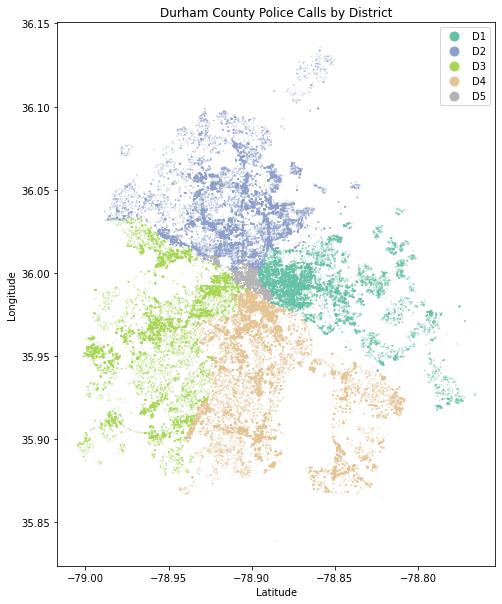

In [672]:
# Plot the call data by district using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpdcalls.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", ax=ax, aspect=1);


ax.set(title='Durham County Police Calls by District')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

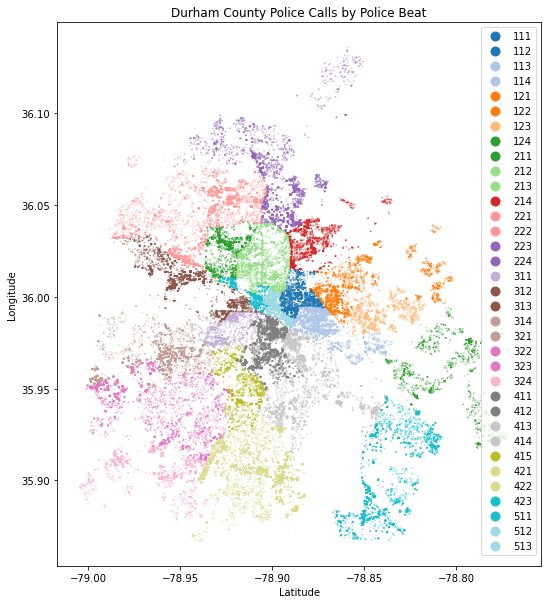

In [673]:
# Plot the dpd_w_policebeats data by Beat using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="tab20", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

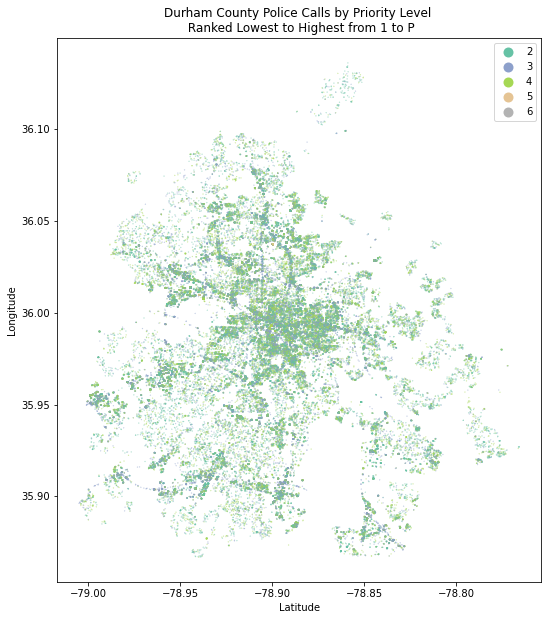

In [674]:
# Plot the call data by Priority using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

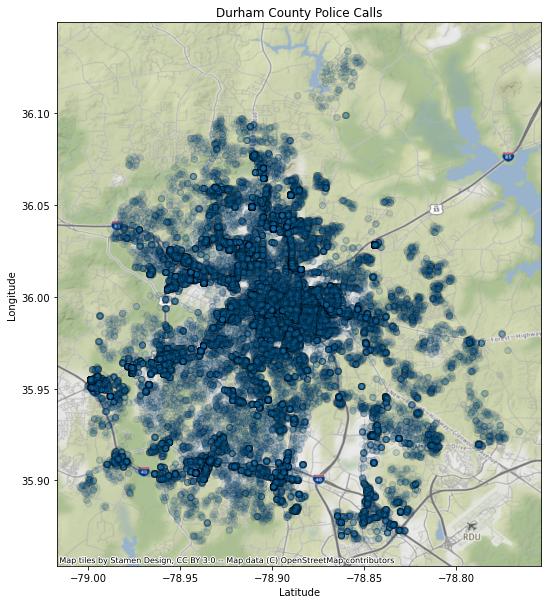

In [675]:
#Adding a base map to the caller data
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

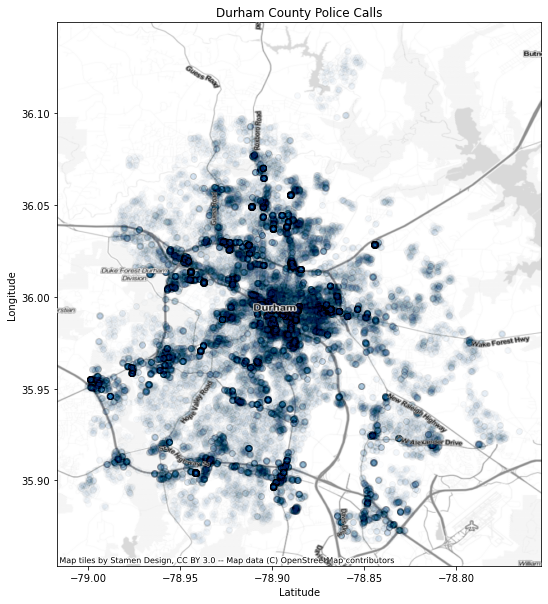

In [676]:
#Adding a base map to the caller data with labels
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.01, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

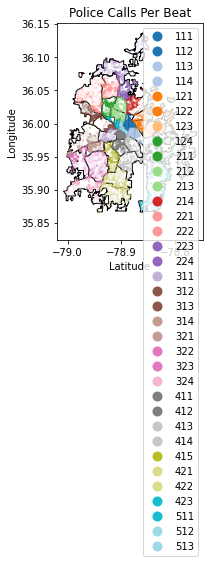

In [677]:
#Plot the two data sets together setting the aspect 'equal'
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Beat', categorical=True, legend=True, marker='o', cmap='tab20', markersize=0.001)

ax.set(title='Police Calls Per Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

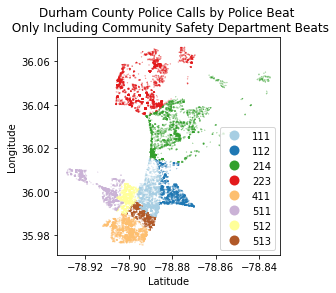

In [678]:
#Plot the two data sets together with only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe = dpd_w_policebeats.loc[dpd_w_policebeats['LAWBEAT'].isin(commsafe_list)].copy()
commsafe.head()

fig, ax=plt.subplots()

commsafe.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Paired", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat \n Only Including Community Safety Department Beats')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [18]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['LAWBEAT']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

LAWBEAT  calls_count
0      111         2477
1      112         2334
2      113         2839
3      114         2805
4      121         2495

In [19]:
#Merge policebeats data with allcalls
#Label merged data as combcalls2_merge
callcount_w_beat = pd.merge(allcalls, policebeats, on ='LAWBEAT')

callcount_w_beat.head(3)

LAWBEAT  calls_count                                           geometry  \
0      111         2477  POLYGON ((-78.89039 36.01517, -78.89038 36.015...   
1      112         2334  POLYGON ((-78.88787 36.01473, -78.88734 36.014...   
2      113         2839  POLYGON ((-78.87372 35.99369, -78.87458 35.991...   

   OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1  \
0        50  28608.800781      I        yes      D1  111       None   
1        51  26265.849609      I        yes      D1  112       None   
2        62  20667.539062      I        yes      D1  113       None   

     ShapeSTAre    ShapeSTLen  LBeat  id  
0  2.010252e+07  28608.799743    111   0  
1  2.079934e+07  26265.852604    112   1  
2  2.159195e+07  20667.538873    113   2

In [20]:
#Merged the data with combcalls by changing the index
callcount_w_beat = policebeats.set_index('LAWBEAT').join(allcalls.set_index('LAWBEAT'))

callcount_w_beat.head(3)

geometry  OBJECTID  \
LAWBEAT                                                                
111      POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
112      POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
113      POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   

            PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
LAWBEAT                                                                         
111      28608.800781      I        yes      D1  111       None  2.010252e+07   
112      26265.849609      I        yes      D1  112       None  2.079934e+07   
113      20667.539062      I        yes      D1  113       None  2.159195e+07   

           ShapeSTLen  LBeat  id  calls_count  
LAWBEAT                                        
111      28608.799743    111   0         2477  
112      26265.852604    112   1         2334  
113      20667.538873    113   2         2839

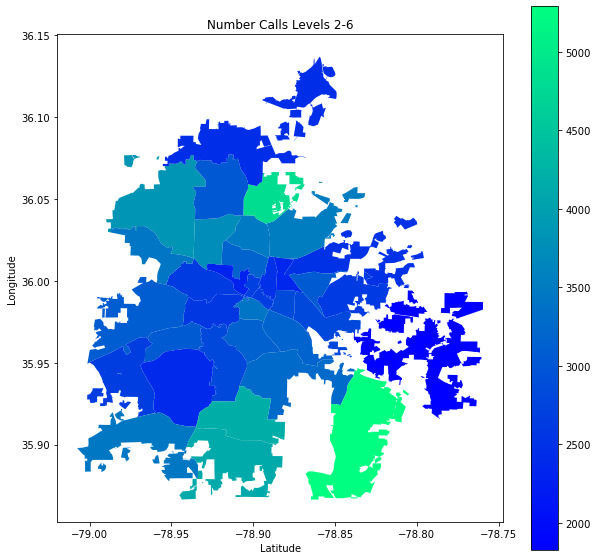

In [1240]:
#Plot choropleth map of number of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

callcount_w_beat.plot(column='calls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Number Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [21]:
##Census Data Analysis
#Load in census data for North Carolina
ncblockmap = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2021_37_tabblock20/tl_2021_37_tabblock20.shp')
ncblockmap.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        37        037    020203      2037  370370202032037  Block 2037   
1        37        105    030401      1015  371050304011015  Block 1015   
2        37        183    053615      2052  371830536152052  Block 2052   
3        37        035    011501      2036  370350115012036  Block 2036   
4        37        037    020201      2003  370370202012003  Block 2003   

  MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0   G5040    R   None     None          S  2401181      1879  +35.7514163   
1   G5040    R   None     None          S   537166      1888  +35.4895705   
2   G5040    R   None     None          S        0     10154  +35.8791781   
3   G5040    R   None     None          S  2009262      7616  +35.5829239   
4   G5040    R   None     None          S  1557161     14689  +35.8325256   

     INTPTLON20                                           geometry  
0  -079.2909223  POLYGON ((-79.29947 35.75562, -79.29942 35.756...  
1  -079.1541245  POLYGON ((-79.16050 35.48907, -79.15995 35.489...  
2  -078.8085709  POLYGON ((-78.80964 35.87904, -78.80962 35.879...  
3  -081.0441821  POLYGON ((-81.05569 35.58896, -81.05537 35.589...  
4  -079.3723536  POLYGON ((-79.37919 35.83136, -79.37905 35.831...

In [22]:
#Set the crs for the census data
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [23]:
#Load in race data from census bureau
#Change id variable to GEOID20
racedata = pd.read_csv('/Users/sadiesheridan/Downloads/Race data/DECENNIALPL2020.P1_data_with_overlays_2022-06-06T132656.csv', skiprows = 1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata.head()

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           
3                                                  3           
4                                                  6           

    !!Total:!!Population of two or more races:  \
0                                            6   
1                                            7   
2                                            4   
3                                            0   
4                                            1   

    !!Total:!!Population of two or more races:!!Population of two races:  \
0                                                  3                       
1                                                  3                       
2                                                  4                       
3                                                  0                       
4                                                  1                       

    !!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African Americ

In [24]:
#Filter the block map to only include Durham blocks (63)
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4402, 35)

In [25]:
#Merge the Durham block data with the race data
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap.head()

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                 20           
1                                                 10           
2                                                  8           
3                                                  3           
4                                                  6           

    !!Total:!!Population of two or more races:  \
0                                            6   
1                                            7   
2                                            4   
3                                            0   
4                                            1   

    !!Total:!!Population of two or more races:!!Population of two races:  \
0                                                  3                       
1                                                  3                       
2                                                  4                       
3                                                  0                       
4                                                  1                       

    !!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African Americ

In [26]:
#Make index GEOID20
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracemap.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20      NAME20 MTFCC20  \
GEOID20                                                                        
370630018064007        37        063    001806      4007  Block 4007   G5040   
370630018017028        37        063    001801      7028  Block 7028   G5040   
370630021004022        37        063    002100      4022  Block 4022   G5040   

                UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20  \
GEOID20                                                              
370630018064007    R   None     None          S   166664      5599   
370630018017028    R   None     None          S        0   1715331   
370630021004022    R   None     None          S  3013615     21848   

                  INTPTLAT20    INTPTLON20  \
GEOID20                                      
370630018064007  +36.0127651  -078.8227713   
370630018017028  +36.0696478  -078.7923950   
370630021004022  +36.1529771  -078.8218382   

                                                          geometry  \
GEOID20                                                              
370630018064007  POLYGON ((-78.82464 36.01317, -78.82456 36.013...   
370630018017028  POLYGON ((-78.80507 36.06321, -78.80467 36.063...   
370630021004022  POLYGON ((-78.83005 36.15072, -78.83001 36.150...   

                                              Geographic Area Name   !!Total:  \
GEOID20                                                                         
370630018064007  Block 4007, Block Group 4, Census Tract 18.06,...         80   
370630018017028  Block 7028, Block Group 7, Census Tract 18.01,...          0   
370630021004022  Block 4022, Block Group 4, Census Tract 21, Du...         88   

                  !!Total:!!Population of one race:  \
GEOID20                                               
370630018064007                                  73   
370630018017028                                   0   
370630021004022                                  88   

                  !!Total:!!Population of one race:!!White alone  \
GEOID20                                                            
370630018064007                                               41   
370630018017028                                                0   
370630021004022                                               82   

                  !!Total:!!Population of one race:!!Black or African American alone  \
GEOID20                                                                                
370630018064007                                                  1                     
370630018017028                                                  0                     
370630021004022                                                  5                     

                  !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
GEOID20                                                                                        
370630018064007                                                  0                             
370630018017028                                                  0                             
370630021004022                                                  0                             

                  !!Total:!!Population of one race:!!Asian alone  \
GEOID20                                                            
370630018064007                                                0   
370630018017028                                                0   
370630021004022                                                1   

                  !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
GEOID20                                                                                                 
370630018064007                                                  0                                      
370630018017028                                                  0               

In [696]:
#Check the geometry of the merged data
durhamracemap.geometry

GEOID20
370630018064007    POLYGON ((-78.82464 36.01317, -78.82456 36.013...
370630018017028    POLYGON ((-78.80507 36.06321, -78.80467 36.063...
370630021004022    POLYGON ((-78.83005 36.15072, -78.83001 36.150...
370630020362000    POLYGON ((-78.91718 35.90556, -78.91702 35.905...
370630018017041    POLYGON ((-78.83393 36.05431, -78.83343 36.055...
                                         ...                        
370630022002048    POLYGON ((-78.89882 35.99520, -78.89875 35.995...
370630022001012    POLYGON ((-78.90950 36.00137, -78.90934 36.001...
370630007003016    POLYGON ((-78.92578 35.97207, -78.92571 35.972...
370630020262014    POLYGON ((-78.89767 35.94758, -78.89762 35.947...
370630013011001    POLYGON ((-78.89541 35.98186, -78.89538 35.981...
Name: geometry, Length: 4401, dtype: geometry

In [27]:
#Change the column names for durhamracemap
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

warnings.filterwarnings('ignore')

/var/folders/_r/3n990z1121zg5rjwb25b1tvm0000gn/T/ipykernel_26438/184276123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/_r/3n990z1121zg5rjwb25b1tvm0000gn/T/ipykernel_26438/184276123.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/_r/3n990z1121zg5rjwb25b1tvm0000gn/T/ipykernel_26438/184276123.py:3: FutureWarning: The default value of regex will change from True to False in a fut

In [28]:
#Find the proportion of specific races compared to the total population
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']

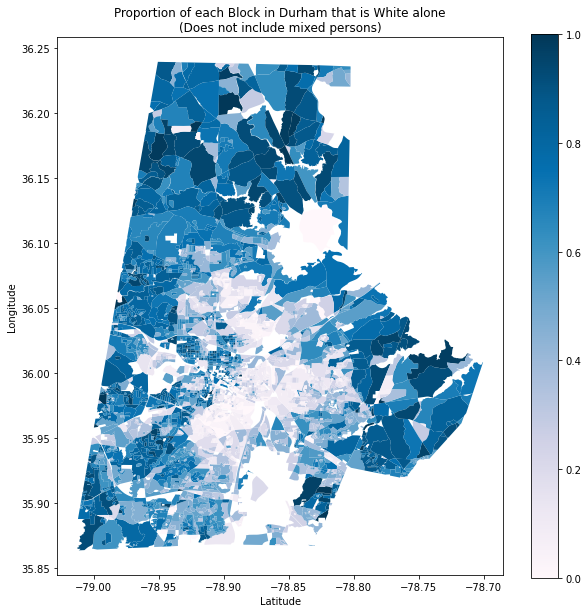

In [1421]:
#Plot choropleth map with merged data for white population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

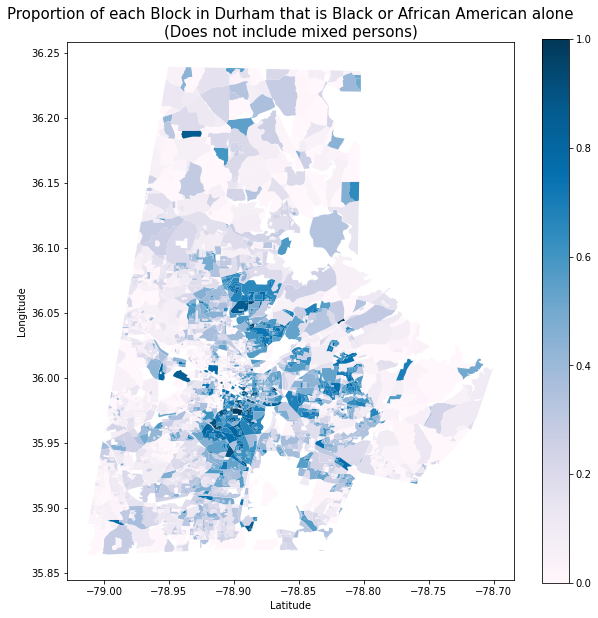

In [1422]:
#Plot choropleth map with merged data for Black population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [29]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])

warnings.filterwarnings('ignore')

In [30]:
#Look at the first five rows of cblockDurhamBeats
cblockDurhamBeats.sort_values(by='Beat', inplace=True, ascending=False)
cblockDurhamBeats

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
52819         37        063    001400      2007  370630014002007  Block 2007   
204177        37        063    001100      1022  370630011001022  Block 1022   
91762         37        063    001100      1009  370630011001009  Block 1009   
217411        37        063    001100      1035  370630011001035  Block 1035   
52709         37        063    001100      1008  370630011001008  Block 1008   
...          ...        ...       ...       ...              ...         ...   
93762         37        063    000900      2004  370630009002004  Block 2004   
49011         37        063    002200      2000  370630022002000  Block 2000   
94499         37        063    000200      2012  370630002002012  Block 2012   
75811         37        063    001100      3008  370630011003008  Block 3008   
168016        37        063    000900      2000  370630009002000  Block 2000   

       MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20  \
52819    G5040    R   None     None          S     6349         0   
204177   G5040    R   None     None          S    16969         0   
91762    G5040    R   None     None          S     3033         0   
217411   G5040    R   None     None          S    25542         0   
52709    G5040    R   None     None          S     6390         0   
...        ...  ...    ...      ...        ...      ...       ...   
93762    G5040    R   None     None          S    18954         0   
49011    G5040    R   None     None          S    40275         0   
94499    G5040    R   None     None          S    20579         0   
75811    G5040    R   None     None          S    11891         0   
168016   G5040    R   None     None          S    99341         0   

         INTPTLAT20    INTPTLON20  \
52819   +35.9837203  -078.8901200   
204177  +35.9869526  -078.8887148   
91762   +35.9906010  -078.8933827   
217411  +35.9853577  -078.8896915   
52709   +35.9900807  -078.8929960   
...             ...           ...   
93762   +35.9998061  -078.8896423   
49011   +36.0024055  -078.8942098   
94499   +36.0037900  -078.8896425   
75811   +35.9965455  -078.8927976   
168016  +36.0022676  -078.8883885   

                                                 geometry  Beat  
52819   POLYGON ((-78.89064 35.98362, -78.89063 35.983...   513  
204177  POLYGON ((-78.88961 35.98642, -78.88901 35.987...   513  
91762   POLYGON ((-78.89378 35.99104, -78.89281 35.990...   513  
217411  POLYGON ((-78.89256 35.98571, -78.89198 35.985...   513  
52709   POLYGON ((-78.89355 35.99029, -78.89281 35.990...   513  
...                                                   ...   ...  
93762   POLYGON ((-78.89047 36.00036, -78.88967 36.000...   111  
49011   POLYGON ((-78.89539 36.00128, -78.89536 36.001...   111  
94499   POLYGON ((-78.89076 36.00415, -78.88968 36.004...   111  
75811   POLYGON ((-78.89355 35.99636, -78.89353 35.996...   111  
168016  POLYGON ((-78.89073 36.00327, -78.89020 36.003...   111  

[3305 rows x 17 columns]

In [31]:
#Creating cblockDurhamBeats with only beats that the safety department works with
cblockcomsafebeats = cblockDurhamBeats.copy()
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
cblockcomsafebeats = cblockDurhamBeats.loc[cblockDurhamBeats['Beat'].isin(commsafe_list)].copy()
cblockcomsafebeats.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
52819         37        063    001400      2007  370630014002007  Block 2007   
204177        37        063    001100      1022  370630011001022  Block 1022   
91762         37        063    001100      1009  370630011001009  Block 1009   
217411        37        063    001100      1035  370630011001035  Block 1035   
52709         37        063    001100      1008  370630011001008  Block 1008   

       MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20  \
52819    G5040    R   None     None          S     6349         0   
204177   G5040    R   None     None          S    16969         0   
91762    G5040    R   None     None          S     3033         0   
217411   G5040    R   None     None          S    25542         0   
52709    G5040    R   None     None          S     6390         0   

         INTPTLAT20    INTPTLON20  \
52819   +35.9837203  -078.8901200   
204177  +35.9869526  -078.8887148   
91762   +35.9906010  -078.8933827   
217411  +35.9853577  -078.8896915   
52709   +35.9900807  -078.8929960   

                                                 geometry  Beat  
52819   POLYGON ((-78.89064 35.98362, -78.89063 35.983...   513  
204177  POLYGON ((-78.88961 35.98642, -78.88901 35.987...   513  
91762   POLYGON ((-78.89378 35.99104, -78.89281 35.990...   513  
217411  POLYGON ((-78.89256 35.98571, -78.89198 35.985...   513  
52709   POLYGON ((-78.89355 35.99029, -78.89281 35.990...   513

In [32]:
#Creating beat combined with race and blocks but keeping block geometries
blockswithrace = gpd.sjoin(cblockcomsafebeats, durhamracemap)
blockswithrace['propwhite']= blockswithrace['total_population_of_one_race_white_alone'] / blockswithrace['total_']
blockswithrace.head(3)

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
52819         37        063    001400      2007  370630014002007  Block 2007   
225458        37        063    001400      2005  370630014002005  Block 2005   
116207        37        063    001400      2004  370630014002004  Block 2004   

       MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20  \
52819    G5040    R   None     None          S     6349         0   
225458   G5040    R   None     None          S    37286         0   
116207   G5040    R   None     None          S     7451         0   

         INTPTLAT20    INTPTLON20  \
52819   +35.9837203  -078.8901200   
225458  +35.9837008  -078.8915109   
116207  +35.9846603  -078.8910175   

                                                 geometry  Beat  \
52819   POLYGON ((-78.89064 35.98362, -78.89063 35.983...   513   
225458  POLYGON ((-78.89326 35.98407, -78.89258 35.985...   513   
116207  POLYGON ((-78.89253 35.98530, -78.89249 35.985...   513   

            index_right statefp20 countyfp20 tractce20 blockce20      name20  \
52819   370630014002008        37        063    001400      2008  Block 2008   
225458  370630014002008        37        063    001400      2008  Block 2008   
116207  370630014002008        37        063    001400      2008  Block 2008   

       mtfcc20 ur20 uace20 uatype20 funcstat20  aland20  awater20  \
52819    G5040    R   None     None          S    98375         0   
225458   G5040    R   None     None          S    98375         0   
116207   G5040    R   None     None          S    98375         0   

         intptlat20    intptlon20  \
52819   +35.9829575  -078.8887418   
225458  +35.9829575  -078.8887418   
116207  +35.9829575  -078.8887418   

                                     geographic_area_name  total_  \
52819   Block 2008, Block Group 2, Census Tract 14, Du...      31   
225458  Block 2008, Block Group 2, Census Tract 14, Du...      31   
116207  Block 2008, Block Group 2, Census Tract 14, Du...      31   

        total_population_of_one_race_  \
52819                              29   
225458                             29   
116207                             29   

        total_population_of_one_race_white_alone  \
52819                                          0   
225458                                         0   
116207                                         0   

        total_population_of_one_race_black_or_african_american_alone  \
52819                                                  28              
225458                                                 28              
116207                                                 28              

        total_population_of_one_race_american_indian_and_alaska_native_alone  \
52819                                                   1                      
225458                                                  1                      
116207                                                  1                      

        total_population_of_one_race_asian_alone  \
52819                                          0   
225458                                         0   
116207                                         0   

        total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
52819                                                   0                               
225458                                                  0                               
116207                                                  0                               

        total_population_of_one_race_some_other_race_alone  \
52819                                                   0    
225458                                                  0    
116207                                                  0    

        total_population_of_two_or_more_races_  \
52819                                        2   
225458                                       2   
116207            

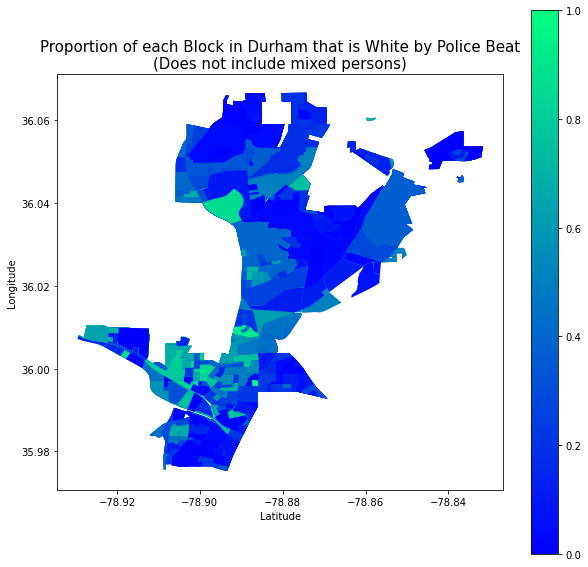

In [1427]:
#Plot the proportion of white people by block in just the saftey department beats
fig, ax = plt.subplots(figsize = (10,10))
blockswithrace.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [33]:
#Merging race data into the police beat and block data
beatswithrace = pd.merge(racedata, cblockDurhamBeats)
beatswithrace.head(10)

Geographic Area Name   !!Total:  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...        108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...         35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...         38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...         43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...         31   
5  Block 1005, Block Group 1, Census Tract 1.01, ...         55   
6  Block 1006, Block Group 1, Census Tract 1.01, ...         64   
7  Block 1007, Block Group 1, Census Tract 1.01, ...         23   
8  Block 1008, Block Group 1, Census Tract 1.01, ...         24   
9  Block 1009, Block Group 1, Census Tract 1.01, ...         37   

    !!Total:!!Population of one race:  \
0                                 102   
1                                  28   
2                                  34   
3                                  43   
4                                  30   
5                                  46   
6                                  57   
7                                  22   
8                                  21   
9                                  35   

    !!Total:!!Population of one race:!!White alone  \
0                                               18   
1                                               13   
2                                               17   
3                                               21   
4                                                5   
5                                               14   
6                                               21   
7                                               22   
8                                               18   
9                                               28   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                                 61                     
1                                                  5                     
2                                                  9                     
3                                                 19                     
4                                                 18                     
5                                                 16                     
6                                                  8                     
7                                                  0                     
8                                                  0                     
9                                                  1                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                  3                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             
5                                                  0                             
6                                                  0                             
7                                                  0                             
8                                                  0                             
9                                                  0                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                1   
5                                                1   
6                                                3   
7                                                0   
8                                          

In [34]:
#Grouping the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat.head(10)

Beat   !!Total:   !!Total:!!Population of one race:  \
0   111       3949                                3539   
1   112       3083                                2860   
2   113       4094                                3876   
3   114       5631                                5214   
4   121       8025                                7501   
5   122       3209                                2906   
6   123       9036                                8521   
7   124      14920                               13922   
8   211       6544                                5972   
9   212       7901                                7116   

    !!Total:!!Population of one race:!!White alone  \
0                                             1242   
1                                              454   
2                                              891   
3                                              741   
4                                             1485   
5                                              315   
6                                             1113   
7                                             7367   
8                                             4211   
9                                             4863   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                               1487                     
1                                               1276                     
2                                               2046                     
3                                               2981                     
4                                               4619                     
5                                               1398                     
6                                               5136                     
7                                               5033                     
8                                                813                     
9                                               1303                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                 91                             
1                                                 95                             
2                                                 66                             
3                                                 96                             
4                                                 88                             
5                                                 97                             
6                                                 81                             
7                                                 52                             
8                                                 35                             
9                                                 85                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                               73   
1                                               18   
2                                               84   
3                                               61   
4                                               74   
5                                                9   
6                                              115   
7                                              936   
8                                              330   
9                                              215   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  3                                      
1                                                  1                                      
2                                                  1                                      
3                                                  1                                      
4

In [35]:
#Find the sum of total column
popsumbybeat[' !!Total:'].sum()

284069

In [36]:
#Adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(policebeats, popsumbybeat, left_on='LAWBEAT', right_on='Beat')
raceineachbeat.head(3)

LAWBEAT                                           geometry  OBJECTID  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1      112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2      113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   

      PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
1  26265.849609      I        yes      D1  112       None  2.079934e+07   
2  20667.539062      I        yes      D1  113       None  2.159195e+07   

     ShapeSTLen  LBeat  id  Beat   !!Total:  \
0  28608.799743    111   0   111       3949   
1  26265.852604    112   1   112       3083   
2  20667.538873    113   2   113       4094   

    !!Total:!!Population of one race:  \
0                                3539   
1                                2860   
2                                3876   

    !!Total:!!Population of one race:!!White alone  \
0                                             1242   
1                                              454   
2                                              891   

    !!Total:!!Population of one race:!!Black or African American alone  \
0                                               1487                     
1                                               1276                     
2                                               2046                     

    !!Total:!!Population of one race:!!American Indian and Alaska Native alone  \
0                                                 91                             
1                                                 95                             
2                                                 66                             

    !!Total:!!Population of one race:!!Asian alone  \
0                                               73   
1                                               18   
2                                               84   

    !!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone  \
0                                                  3                                      
1                                                  1                                      
2                                                  1                                      

    !!Total:!!Population of one race:!!Some Other Race alone  \
0                                                643           
1                                               1016           
2                                                788           

    !!Total:!!Population of two or more races:  \
0                                          410   
1                                          223   
2                                          218   

    !!Total:!!Population of two or more races:!!Population of two races:  \
0                                                384                       
1                                                202                       
2                                                194                       

    !!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American  \
0                                                 47                                                         
1                                                 30                                                         
2                                                 63                                                         

    !!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native  \
0                                                 24                                                                 
1                                                 22                                                                 
2                                                  8            

In [37]:
#Change the column names for raceineachbeat
raceineachbeat.columns = raceineachbeat.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
raceineachbeat.columns = raceineachbeat.columns.str.replace('[#,@,&,!]', '')
raceineachbeat.columns = raceineachbeat.columns.str.replace('[:]', '_')

warnings.filterwarnings('ignore')

In [38]:
#Adding new columns to race in police beat data set
raceineachbeat['area'] = raceineachbeat.area
raceineachbeat['popdensity']= raceineachbeat['total_'] / raceineachbeat['area']
raceineachbeat['propwhite']= raceineachbeat['total_population_of_one_race_white_alone'] / raceineachbeat['total_']
raceineachbeat['propblack']= raceineachbeat['total_population_of_one_race_black_or_african_american_alone'] / raceineachbeat['total_']
raceineachbeat['propnativeamerican']= raceineachbeat['total_population_of_one_race_american_indian_and_alaska_native_alone'] / raceineachbeat['total_']
raceineachbeat['propasian']= raceineachbeat['total_population_of_one_race_asian_alone'] / raceineachbeat['total_']
raceineachbeat['proppacislander']= raceineachbeat['total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone'] / raceineachbeat['total_']
raceineachbeat['other']= raceineachbeat['total_'] - raceineachbeat['total_population_of_one_race_']
raceineachbeat['propother']= raceineachbeat['other'] / raceineachbeat['total_']
raceineachbeat.head()

lawbeat                                           geometry  objectid  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1      112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2      113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
3      114  MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
4      121  MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   

      perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
1  26265.849609      I        yes      D1  112       None  2.079934e+07   
2  20667.539062      I        yes      D1  113       None  2.159195e+07   
3  53321.980469      I        yes      D1  114       None  6.103382e+07   
4  14495.120117      I         no      D1  121       None  7.008533e+06   

     shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
0  28608.799743    111   0   111    3949                           3539   
1  26265.852604    112   1   112    3083                           2860   
2  20667.538873    113   2   113    4094                           3876   
3  53321.974873    114   3   114    5631                           5214   
4  14495.120026    121   4   121    8025                           7501   

   total_population_of_one_race_white_alone  \
0                                      1242   
1                                       454   
2                                       891   
3                                       741   
4                                      1485   

   total_population_of_one_race_black_or_african_american_alone  \
0                                               1487              
1                                               1276              
2                                               2046              
3                                               2981              
4                                               4619              

   total_population_of_one_race_american_indian_and_alaska_native_alone  \
0                                                 91                      
1                                                 95                      
2                                                 66                      
3                                                 96                      
4                                                 88                      

   total_population_of_one_race_asian_alone  \
0                                        73   
1                                        18   
2                                        84   
3                                        61   
4                                        74   

   total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
0                                                  3                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  4                               

   total_population_of_one_race_some_other_race_alone  \
0                                                643    
1                                               1016    
2                                                788    
3                                               1334    
4                                               1231    

   total_population_of_two_or_more_races_  \
0                                     410   
1                                     223   
2                                     218   
3                                     417   
4                                     524   

   total_population_of_two_or_more_races_population_of_two_races_  \
0                                         

In [2013]:
#Sorting by population density
raceineachbeat.sort_values(by='propblack', inplace=True, ascending=False)
raceineachbeat.head()

lawbeat                                           geometry  objectid  \
25      412  POLYGON ((-78.90870 35.97692, -78.90816 35.976...        75   
26      413  POLYGON ((-78.89017 35.98233, -78.88961 35.982...        71   
24      411  POLYGON ((-78.90125 35.98965, -78.89941 35.988...        67   
14      223  MULTIPOLYGON (((-78.89372 36.06586, -78.89365 ...        21   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   

       perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
25  33732.519531      I        yes      D4  412       None  5.757125e+07   
26  45203.929688      I        yes      D4  413       None  6.563018e+07   
24  24141.640625      I        yes      D4  411       None  2.140812e+07   
14  16095.400391      I         no      D2  223       None  6.891411e+06   
34  20647.179688      I        yes      D5  513       None  9.114313e+06   

      shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
25  33732.518542    412  25   412    7737                           7421   
26  45203.932226    413  26   413    4808                           4464   
24  24141.641318    411  24   411    3261                           3041   
14  16095.395041    223  14   223    8338                           7707   
34  20647.175971    513  34   513    1677                           1587   

    total_population_of_one_race_white_alone  \
25                                       378   
26                                       363   
24                                       546   
14                                      1238   
34                                       405   

    total_population_of_one_race_black_or_african_american_alone  \
25                                               6308              
26                                               3112              
24                                               2094              
14                                               5322              
34                                               1003              

    total_population_of_one_race_american_indian_and_alaska_native_alone  \
25                                                 36                      
26                                                 32                      
24                                                 24                      
14                                                 77                      
34                                                  5                      

    total_population_of_one_race_asian_alone  \
25                                        35   
26                                        36   
24                                        37   
14                                       184   
34                                        58   

    total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
25                                                  0                               
26                                                  2                               
24                                                  4                               
14                                                  2                               
34                                                  1                               

    total_population_of_one_race_some_other_race_alone  \
25                                                664    
26                                                919    
24                                                336    
14                                                884    
34                                                115    

    total_population_of_two_or_more_races_  \
25                                     316   
26                                     344   
24                                     220   
14                                     631   
34                                      90   

    total_population_of_two_or_more_races_population

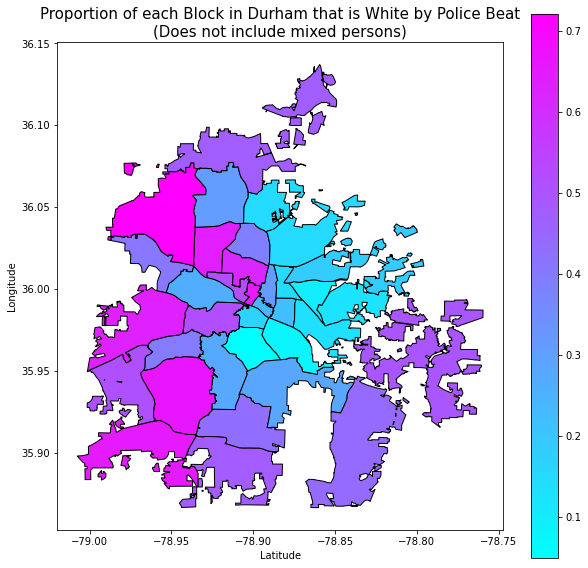

In [2010]:
#Plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propwhite',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1, edgecolor='black');

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

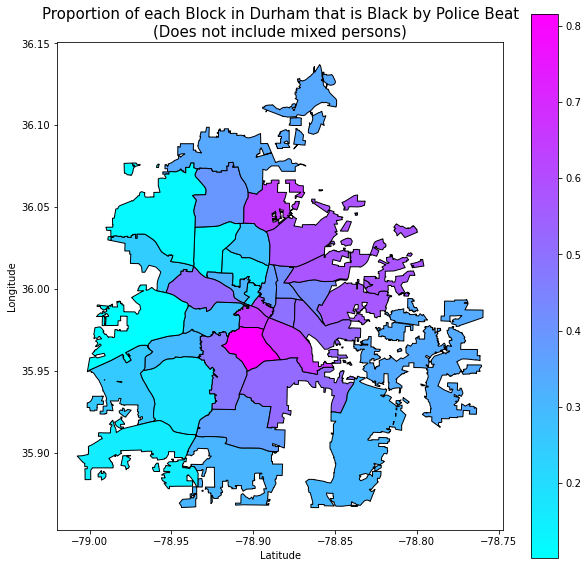

In [2011]:
#Plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propblack',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1, edgecolor='black');

plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [39]:
#Print the five beats with the highest proportion of Black people
raceineachbeatprops = raceineachbeat[['lawbeat', 'propblack']]
raceineachbeatprops.sort_values(by='propblack', inplace=True, ascending=False)
raceineachbeatprops.head()

lawbeat  propblack
25      412   0.815303
26      413   0.647255
24      411   0.642134
14      223   0.638283
34      513   0.598092

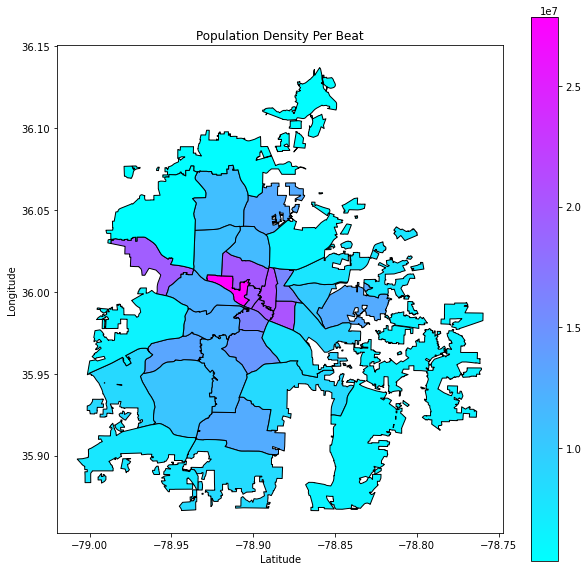

In [1447]:
#Plot the population density data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='popdensity',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1, edgecolor='black');

plt.title("Population Density Per Beat")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [40]:
#Merge call data with raceineachbeat
beatracewithcalls = gpd.sjoin(raceineachbeat, dpdcalls)
beatracewithcalls.head()

lawbeat                                           geometry  objectid  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   

      perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   

     shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   

   total_population_of_one_race_white_alone  \
0                                      1242   
0                                      1242   
0                                      1242   
0                                      1242   
0                                      1242   

   total_population_of_one_race_black_or_african_american_alone  \
0                                               1487              
0                                               1487              
0                                               1487              
0                                               1487              
0                                               1487              

   total_population_of_one_race_american_indian_and_alaska_native_alone  \
0                                                 91                      
0                                                 91                      
0                                                 91                      
0                                                 91                      
0                                                 91                      

   total_population_of_one_race_asian_alone  \
0                                        73   
0                                        73   
0                                        73   
0                                        73   
0                                        73   

   total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
0                                                  3                               
0                                                  3                               
0                                                  3                               
0                                                  3                               
0                                                  3                               

   total_population_of_one_race_some_other_race_alone  \
0                                                643    
0                                                643    
0                                                643    
0                                                643    
0                                                643    

   total_population_of_two_or_more_races_  \
0                                     410   
0                                     410   
0                                     410   
0                                     410   
0                                     410   

   total_population_of_two_or_more_races_population_of_two_races_  \
0                                         

In [41]:
#Filter out beatracewithcalls for only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
beatracewithcalls2 = beatracewithcalls.loc[beatracewithcalls['beat'].isin(commsafe_list)].copy()
beatracewithcalls2.head()

lawbeat                                           geometry  objectid  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   

      perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
0  28608.800781      I        yes      D1  111       None  2.010252e+07   

     shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   
0  28608.799743    111   0   111    3949                           3539   

   total_population_of_one_race_white_alone  \
0                                      1242   
0                                      1242   
0                                      1242   
0                                      1242   
0                                      1242   

   total_population_of_one_race_black_or_african_american_alone  \
0                                               1487              
0                                               1487              
0                                               1487              
0                                               1487              
0                                               1487              

   total_population_of_one_race_american_indian_and_alaska_native_alone  \
0                                                 91                      
0                                                 91                      
0                                                 91                      
0                                                 91                      
0                                                 91                      

   total_population_of_one_race_asian_alone  \
0                                        73   
0                                        73   
0                                        73   
0                                        73   
0                                        73   

   total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
0                                                  3                               
0                                                  3                               
0                                                  3                               
0                                                  3                               
0                                                  3                               

   total_population_of_one_race_some_other_race_alone  \
0                                                643    
0                                                643    
0                                                643    
0                                                643    
0                                                643    

   total_population_of_two_or_more_races_  \
0                                     410   
0                                     410   
0                                     410   
0                                     410   
0                                     410   

   total_population_of_two_or_more_races_population_of_two_races_  \
0                                         

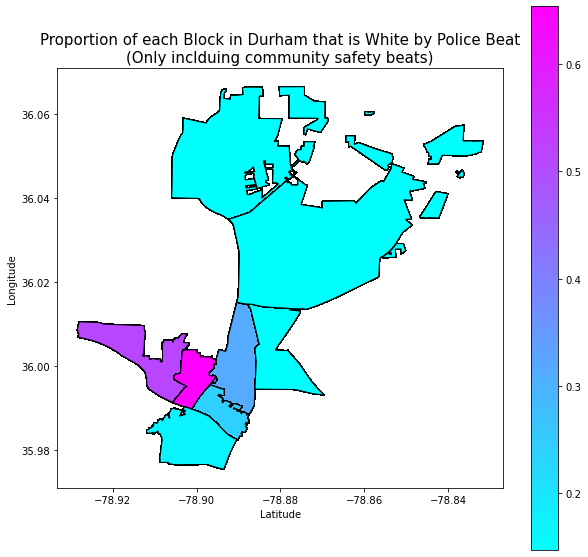

In [1451]:
#Plot the race data by beat for com safe beats
fig, ax = plt.subplots(figsize = (10,10))
beatracewithcalls2.plot(column='propwhite',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1, edgecolor='black');

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Only inclduing community safety beats)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

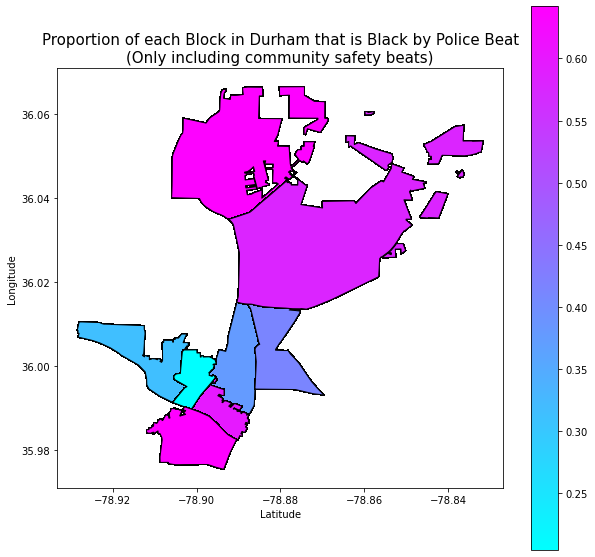

In [1452]:
#Plot the race data by beat for com safe beats
fig, ax = plt.subplots(figsize = (10,10))
beatracewithcalls2.plot(column='propblack',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1, edgecolor='black');

plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Only including community safety beats)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

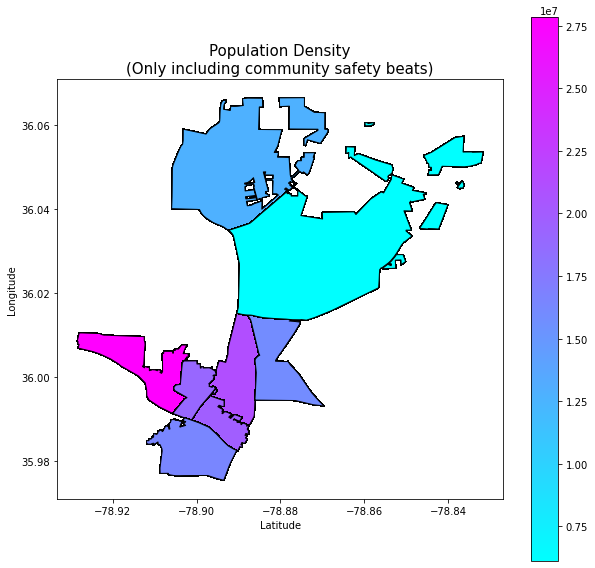

In [1453]:
#Plot the population density by beat for com safe beats
fig, ax = plt.subplots(figsize = (10,10))
beatracewithcalls2.plot(column='popdensity',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1, edgecolor='black');

plt.title("Population Density\n(Only including community safety beats)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [42]:
#Filter call and beat data for com safe
commsafe_list_str = ['511', '512', '513', '411', '111', '112', '214', '223']
allbeats = policebeats.loc[policebeats['LAWBEAT'].isin(commsafe_list)]
allbeatscalls = dpdcalls.loc[dpdcalls['Beat'].isin(commsafe_list_str)]

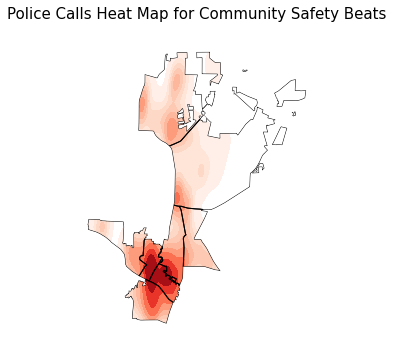

In [1947]:
#Heat map of call density
ax = gplt.kdeplot(
    allbeatscalls, clip=allbeats.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(allbeats, ax=ax, zorder=1, edgecolor='Black')

plt.title("Police Calls Heat Map for Community Safety Beats", fontsize = 15)
plt.show()

In [1462]:
#Filter calls and beats for just beat 214
beat214 = policebeats.loc[policebeats['LAWBEAT'] == 214]
beat214calls = dpdcalls.loc[dpdcalls['Beat'] == '214']

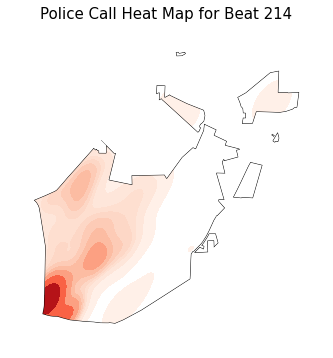

In [1463]:
#Plot just data for beat 214 in a heatmap
ax = gplt.kdeplot(
    beat214calls, clip=beat214.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(beat214, ax=ax, zorder=1)

plt.title("Police Call Heat Map for Beat 214", fontsize = 15)
plt.show()

In [1866]:
#Filter calls and beats for just beat 512
beat512 = policebeats.loc[policebeats['LAWBEAT'] == 512]
beat512calls = dpdcalls.loc[dpdcalls['Beat'] == '512']

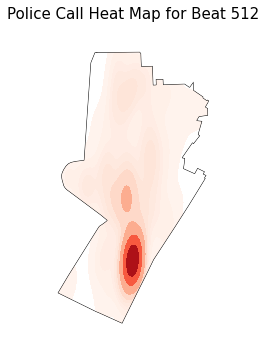

In [1863]:
#Plot just data for beat 512 in a heatmap
ax = gplt.kdeplot(
    beat512calls, clip=beat512.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(beat512, ax=ax, zorder=1)

plt.title("Police Call Heat Map for Beat 512", fontsize = 15)
plt.show()

In [1865]:
#Filter calls and beats for just beat 511
beat212 = policebeats.loc[policebeats['LAWBEAT'] == 212]
beat212calls = dpdcalls.loc[dpdcalls['Beat'] == '212']

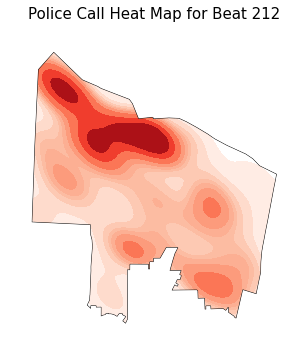

In [1867]:
#Plot just data for beat 512 in a heatmap
ax = gplt.kdeplot(
    beat212calls, clip=beat212.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(beat212, ax=ax, zorder=1)

plt.title("Police Call Heat Map for Beat 212", fontsize = 15)
plt.show()

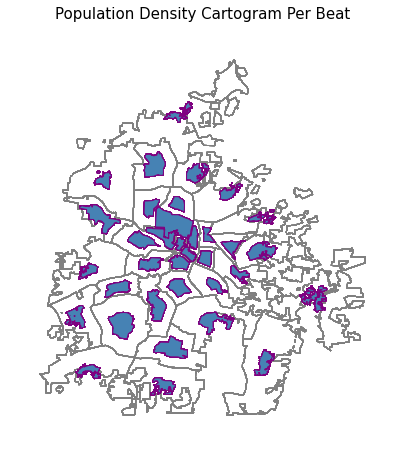

In [748]:
# #Cartogram of population density
# ax = gplt.cartogram(
#     beatracewithcalls, scale='popdensity', limits=(0.2, 1),
#     edgecolor='Purple', figsize=(7, 8)
# )
# gplt.polyplot(beatracewithcalls, edgecolor='gray', ax=ax)

# plt.title("Population Density Cartogram Per Beat", fontsize = 15)
# plt.show()

In [1464]:
#Create new data frame with just proportions for community safety beats
justprop = beatracewithcalls2[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
justprop.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
justprop.head()

White     Black  Native American     Asian     Other
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494

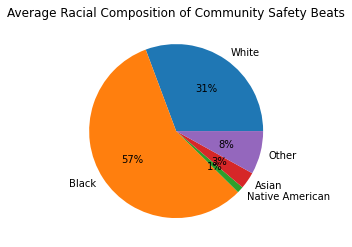

In [1465]:
#Pie chart for justprop
justprop.mean().plot.pie(ylabel='', title='Average Racial Composition of Community Safety Beats', autopct='%1.0f%%');

In [1466]:
#Create new data frame that is just proportions for all of Durham
justpropDurham = beatracewithcalls[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
justpropDurham.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
justpropDurham.head()

White     Black  Native American     Asian     Other
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494
32  0.513351  0.314805         0.001635  0.086467  0.056494

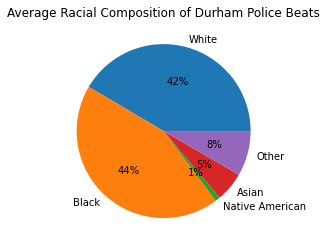

In [1467]:
#Pie chart for justpropDurham
justpropDurham.mean().plot.pie(ylabel='', title='Average Racial Composition of Durham Police Beats', autopct='%1.0f%%');

In [2019]:
#Create a pie chart for highest prop of Black ppl in beat 412
race412 = beatracewithcalls.loc[beatracewithcalls['lawbeat'] == 412].copy()

#Create new data frame that is just proportions for beat 412
race412 = race412[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
race412.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
race412.head()

White     Black  Native American     Asian     Other
25  0.048856  0.815303         0.004653  0.004524  0.040843
25  0.048856  0.815303         0.004653  0.004524  0.040843
25  0.048856  0.815303         0.004653  0.004524  0.040843
25  0.048856  0.815303         0.004653  0.004524  0.040843
25  0.048856  0.815303         0.004653  0.004524  0.040843

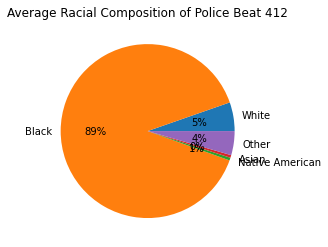

In [2020]:
#Pie chart for race 412
race412.mean().plot.pie(ylabel='', title='Average Racial Composition of Police Beat 412', autopct='%1.0f%%');

In [2022]:
#Create a pie chart for highest prop of Black ppl in beat 411
race411 = beatracewithcalls.loc[beatracewithcalls['beat'] == 411].copy()

#Create new data frame that is just proportions for beat 411
race411 = race411[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
race411.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
race411.head()

White     Black  Native American     Asian     Other
24  0.167433  0.642134          0.00736  0.011346  0.067464
24  0.167433  0.642134          0.00736  0.011346  0.067464
24  0.167433  0.642134          0.00736  0.011346  0.067464
24  0.167433  0.642134          0.00736  0.011346  0.067464
24  0.167433  0.642134          0.00736  0.011346  0.067464

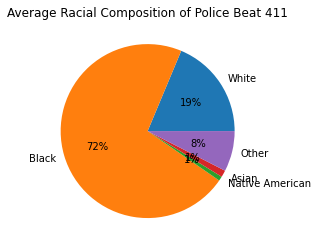

In [2023]:
#Pie chart for race 411
race411.mean().plot.pie(ylabel='', title='Average Racial Composition of Police Beat 411', autopct='%1.0f%%');

In [2024]:
#Create a pie chart for highest prop of Black ppl in beat 413
race413 = beatracewithcalls.loc[beatracewithcalls['beat'] == 413].copy()

#Create new data frame that is just proportions for beat 411
race413 = race413[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
race413.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
race413.head()

White     Black  Native American     Asian     Other
26  0.075499  0.647255         0.006656  0.007488  0.071547
26  0.075499  0.647255         0.006656  0.007488  0.071547
26  0.075499  0.647255         0.006656  0.007488  0.071547
26  0.075499  0.647255         0.006656  0.007488  0.071547
26  0.075499  0.647255         0.006656  0.007488  0.071547

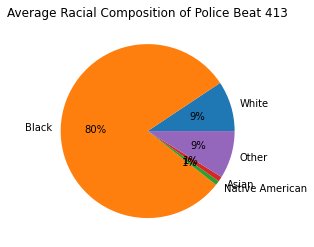

In [2025]:
#Pie chart for race 411
race413.mean().plot.pie(ylabel='', title='Average Racial Composition of Police Beat 413', autopct='%1.0f%%');

In [1989]:
#Create new data frame that is just proportions for all of Durham
justpropDurham_beat = beatracewithcalls2[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother', 'lawbeat']]

#Change column names
justpropDurham_beat.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
justpropDurham_beat = justpropDurham_beat.groupby('lawbeat', as_index=False).mean()
justpropDurham_beat = justpropDurham_beat.set_index('lawbeat')
justpropDurham_beat

White     Black  Native American     Asian     Other
lawbeat                                                         
111      0.314510  0.376551         0.023044  0.018486  0.103824
112      0.147259  0.413883         0.030814  0.005838  0.072332
214      0.147936  0.579693         0.008286  0.009491  0.073968
223      0.148477  0.638283         0.009235  0.022068  0.075678
411      0.167433  0.642134         0.007360  0.011346  0.067464
511      0.513351  0.314805         0.001635  0.086467  0.056494
512      0.653706  0.204131         0.005468  0.051640  0.057108
513      0.241503  0.598092         0.002982  0.034586  0.053667

In [1948]:
beatracewithcalls.head()

lawbeat                                           geometry  objectid  \
32      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
32      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
32      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
32      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
32      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   

       perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
32  32615.019531      I        yes      D5  511       None  2.129644e+07   
32  32615.019531      I        yes      D5  511       None  2.129644e+07   
32  32615.019531      I        yes      D5  511       None  2.129644e+07   
32  32615.019531      I        yes      D5  511       None  2.129644e+07   
32  32615.019531      I        yes      D5  511       None  2.129644e+07   

      shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
32  32615.017763    511  32   511    5505                           5194   
32  32615.017763    511  32   511    5505                           5194   
32  32615.017763    511  32   511    5505                           5194   
32  32615.017763    511  32   511    5505                           5194   
32  32615.017763    511  32   511    5505                           5194   

    total_population_of_one_race_white_alone  \
32                                      2826   
32                                      2826   
32                                      2826   
32                                      2826   
32                                      2826   

    total_population_of_one_race_black_or_african_american_alone  \
32                                               1733              
32                                               1733              
32                                               1733              
32                                               1733              
32                                               1733              

    total_population_of_one_race_american_indian_and_alaska_native_alone  \
32                                                  9                      
32                                                  9                      
32                                                  9                      
32                                                  9                      
32                                                  9                      

    total_population_of_one_race_asian_alone  \
32                                       476   
32                                       476   
32                                       476   
32                                       476   
32                                       476   

    total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
32                                                  0                               
32                                                  0                               
32                                                  0                               
32                                                  0                               
32                                                  0                               

    total_population_of_one_race_some_other_race_alone  \
32                                                150    
32                                                150    
32                                                150    
32                                                150    
32                                                150    

    total_population_of_two_or_more_races_  \
32                                     311   
32                                     311   
32                                     311   
32                                     311   
32                                     311   

    total_population_of_two_or_more_races_population

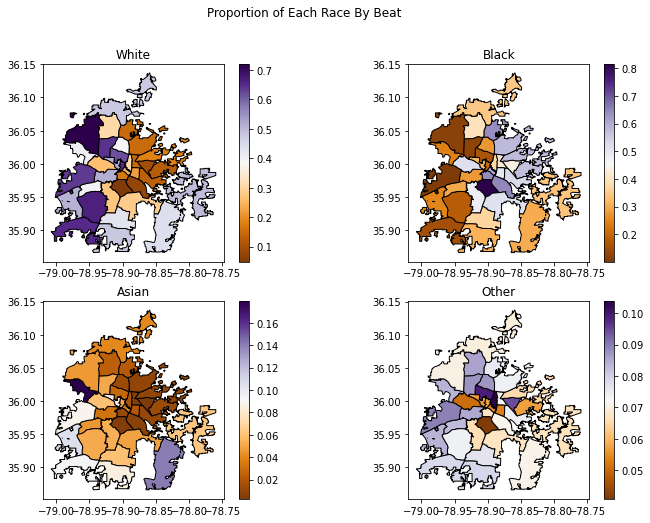

In [1959]:
#Plot subplots of racial data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]
ax11.title.set_text('White')
ax12.title.set_text('Black')
ax21.title.set_text('Asian')
ax22.title.set_text('Other')

# Set figure title
fig.suptitle("Proportion of Each Race By Beat")

#Plot subplots
raceineachbeat.plot(column='propwhite',
                                legend=True,
                                cmap="PuOr", ax=ax11, aspect=1, edgecolor='black');

raceineachbeat.plot(column='propblack',
                                legend=True,
                                cmap="PuOr", ax=ax12, aspect=1, edgecolor='black');

raceineachbeat.plot(column='propasian',
                                legend=True,
                                cmap="PuOr", ax=ax21, aspect=1, edgecolor='black');

raceineachbeat.plot(column='propother',
                                legend=True,
                                cmap="PuOr", ax=ax22, aspect=1, edgecolor='black');

plt.show()

In [43]:
#Load in Hispanic Census Data
hispanicdata = pd.read_csv('/Users/sadiesheridan/Desktop/Hispanic Data/DECENNIALPL2020.P2_data_with_overlays_2022-06-09T143343.csv', skiprows =1)

#Change the geoid to a string 
hispanicdata['GEOID20'] = hispanicdata['id'].str[-15:]
hispanicdata.drop('id', axis=1, inplace=True)
hispanicdata.drop(hispanicdata.iloc[:, 4:74], inplace = True, axis = 1)

#Rename column names
hispanicdata.columns = hispanicdata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hispanicdata.columns = hispanicdata.columns.str.replace('[#,@,&,!]', '')
hispanicdata.columns = hispanicdata.columns.str.replace('[:]', '_')
hispanicdata.rename(columns = {'total_':'total', 'total_not_hispanic_or_latino_':'total_not_hispanic_or_latino'}, inplace = True)
hispanicdata

geographic_area_name  total  \
0     Block 1000, Block Group 1, Census Tract 1.01, ...    108   
1     Block 1001, Block Group 1, Census Tract 1.01, ...     35   
2     Block 1002, Block Group 1, Census Tract 1.01, ...     38   
3     Block 1003, Block Group 1, Census Tract 1.01, ...     43   
4     Block 1004, Block Group 1, Census Tract 1.01, ...     31   
...                                                 ...    ...   
4396  Block 1068, Block Group 1, Census Tract 9801, ...      0   
4397  Block 1069, Block Group 1, Census Tract 9801, ...      0   
4398  Block 1070, Block Group 1, Census Tract 9801, ...      0   
4399  Block 1071, Block Group 1, Census Tract 9801, ...      0   
4400  Block 1072, Block Group 1, Census Tract 9801, ...      0   

      total_hispanic_or_latino  total_not_hispanic_or_latino          geoid20  
0                           25                            83  370630001011000  
1                           12                            23  370630001011001  
2                            8                            30  370630001011002  
3                            0                            43  370630001011003  
4                            7                            24  370630001011004  
...                        ...                           ...              ...  
4396                         0                             0  370639801001068  
4397                         0                             0  370639801001069  
4398                         0                             0  370639801001070  
4399                         0                             0  370639801001071  
4400                         0                             0  370639801001072  

[4401 rows x 5 columns]

In [44]:
#Merge the Hispanic Data with block map
durhamhispanicmap = pd.merge(hispanicdata, durhamblockmap, left_on ='geoid20', right_on='GEOID20')
durhamhispanicmap.drop(['MTFCC20', 'UATYPE20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'BLOCKCE20', 'TRACTCE20', 'UR20', 'UACE20', 'geoid20', 'STATEFP20', 'NAME20'], axis=1, inplace=True)
durhamhispanicmap.head()

geographic_area_name  total  \
0  Block 1000, Block Group 1, Census Tract 1.01, ...    108   
1  Block 1001, Block Group 1, Census Tract 1.01, ...     35   
2  Block 1002, Block Group 1, Census Tract 1.01, ...     38   
3  Block 1003, Block Group 1, Census Tract 1.01, ...     43   
4  Block 1004, Block Group 1, Census Tract 1.01, ...     31   

   total_hispanic_or_latino  total_not_hispanic_or_latino COUNTYFP20  \
0                        25                            83        063   
1                        12                            23        063   
2                         8                            30        063   
3                         0                            43        063   
4                         7                            24        063   

           GEOID20   INTPTLAT20    INTPTLON20  \
0  370630001011000  +36.0194814  -078.8821382   
1  370630001011001  +36.0205516  -078.8893121   
2  370630001011002  +36.0205916  -078.8869754   
3  370630001011003  +36.0205318  -078.8880959   
4  370630001011004  +36.0221289  -078.8796703   

                                            geometry  
0  POLYGON ((-78.88998 36.01852, -78.88995 36.019...  
1  POLYGON ((-78.88993 36.02006, -78.88990 36.021...  
2  POLYGON ((-78.88749 36.02015, -78.88746 36.021...  
3  POLYGON ((-78.88872 36.01988, -78.88867 36.021...  
4  POLYGON ((-78.88098 36.02211, -78.87992 36.022...

In [45]:
#Set the GEOID and drop columns that are not needed
durhamhispanicmap = durhamblockmap.set_index('GEOID20').join(hispanicdata.set_index('geoid20'))
durhamhispanicmap.drop(['MTFCC20', 'UATYPE20', 'FUNCSTAT20', 'ALAND20', 'AWATER20', 'BLOCKCE20', 'TRACTCE20', 'UR20', 'UACE20', 'STATEFP20', 'NAME20'], axis=1, inplace=True)
durhamhispanicmap.head(3)

COUNTYFP20   INTPTLAT20    INTPTLON20  \
GEOID20                                                 
370630018064007        063  +36.0127651  -078.8227713   
370630018017028        063  +36.0696478  -078.7923950   
370630021004022        063  +36.1529771  -078.8218382   

                                                          geometry  \
GEOID20                                                              
370630018064007  POLYGON ((-78.82464 36.01317, -78.82456 36.013...   
370630018017028  POLYGON ((-78.80507 36.06321, -78.80467 36.063...   
370630021004022  POLYGON ((-78.83005 36.15072, -78.83001 36.150...   

                                              geographic_area_name  total  \
GEOID20                                                                     
370630018064007  Block 4007, Block Group 4, Census Tract 18.06,...     80   
370630018017028  Block 7028, Block Group 7, Census Tract 18.01,...      0   
370630021004022  Block 4022, Block Group 4, Census Tract 21, Du...     88   

                 total_hispanic_or_latino  total_not_hispanic_or_latino  
GEOID20                                                                  
370630018064007                        33                            47  
370630018017028                         0                             0  
370630021004022                         0                            88

In [46]:
#Blocks only in the com safe beats
cblockcommsafebeats = cblockDurhamBeats.copy()
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
cblockcommsafebeats = cblockDurhamBeats.loc[cblockDurhamBeats['Beat'].isin(commsafe_list)].copy()
cblockcommsafebeats.head()

STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
52819         37        063    001400      2007  370630014002007  Block 2007   
204177        37        063    001100      1022  370630011001022  Block 1022   
91762         37        063    001100      1009  370630011001009  Block 1009   
217411        37        063    001100      1035  370630011001035  Block 1035   
52709         37        063    001100      1008  370630011001008  Block 1008   

       MTFCC20 UR20 UACE20 UATYPE20 FUNCSTAT20  ALAND20  AWATER20  \
52819    G5040    R   None     None          S     6349         0   
204177   G5040    R   None     None          S    16969         0   
91762    G5040    R   None     None          S     3033         0   
217411   G5040    R   None     None          S    25542         0   
52709    G5040    R   None     None          S     6390         0   

         INTPTLAT20    INTPTLON20  \
52819   +35.9837203  -078.8901200   
204177  +35.9869526  -078.8887148   
91762   +35.9906010  -078.8933827   
217411  +35.9853577  -078.8896915   
52709   +35.9900807  -078.8929960   

                                                 geometry  Beat  
52819   POLYGON ((-78.89064 35.98362, -78.89063 35.983...   513  
204177  POLYGON ((-78.88961 35.98642, -78.88901 35.987...   513  
91762   POLYGON ((-78.89378 35.99104, -78.89281 35.990...   513  
217411  POLYGON ((-78.89256 35.98571, -78.89198 35.985...   513  
52709   POLYGON ((-78.89355 35.99029, -78.89281 35.990...   513

In [47]:
#Join hispanic map with community safety blocks
blockswithhispanics = gpd.sjoin(durhamhispanicmap, cblockcommsafebeats)
blockswithhispanics['prophispanic']= blockswithhispanics['total_hispanic_or_latino'] / blockswithhispanics['total']
blockswithhispanics.head(3)

COUNTYFP20_left INTPTLAT20_left INTPTLON20_left  \
GEOID20                                                           
370630018017041             063     +36.0558254    -078.8296616   
370630018016014             063     +36.0496473    -078.8467110   
370630018016009             063     +36.0426464    -078.8352676   

                                                          geometry  \
GEOID20                                                              
370630018017041  POLYGON ((-78.83393 36.05431, -78.83343 36.055...   
370630018016014  POLYGON ((-78.85571 36.04408, -78.85557 36.044...   
370630018016009  POLYGON ((-78.84667 36.03546, -78.84547 36.037...   

                                              geographic_area_name  total  \
GEOID20                                                                     
370630018017041  Block 7041, Block Group 7, Census Tract 18.01,...      9   
370630018016014  Block 6014, Block Group 6, Census Tract 18.01,...    195   
370630018016009  Block 6009, Block Group 6, Census Tract 18.01,...     97   

                 total_hispanic_or_latino  total_not_hispanic_or_latino  \
GEOID20                                                                   
370630018017041                         3                             6   
370630018016014                        79                           116   
370630018016009                        27                            70   

                 index_right STATEFP20 COUNTYFP20_right TRACTCE20 BLOCKCE20  \
GEOID20                                                                       
370630018017041       225453        37              063    001801      6008   
370630018016014       225453        37              063    001801      6008   
370630018016009       225453        37              063    001801      6008   

                         GEOID20      NAME20 MTFCC20 UR20 UACE20 UATYPE20  \
GEOID20                                                                     
370630018017041  370630018016008  Block 6008   G5040    R   None     None   
370630018016014  370630018016008  Block 6008   G5040    R   None     None   
370630018016009  370630018016008  Block 6008   G5040    R   None     None   

                FUNCSTAT20  ALAND20  AWATER20 INTPTLAT20_right  \
GEOID20                                                          
370630018017041          S   100889         0      +36.0519717   
370630018016014          S   100889         0      +36.0519717   
370630018016009          S   100889         0      +36.0519717   

                INTPTLON20_right  Beat  prophispanic  
GEOID20                                               
370630018017041     -078.8336224   214      0.333333  
370630018016014     -078.8336224   214      0.405128  
370630018016009     -078.8336224   214      0.278351

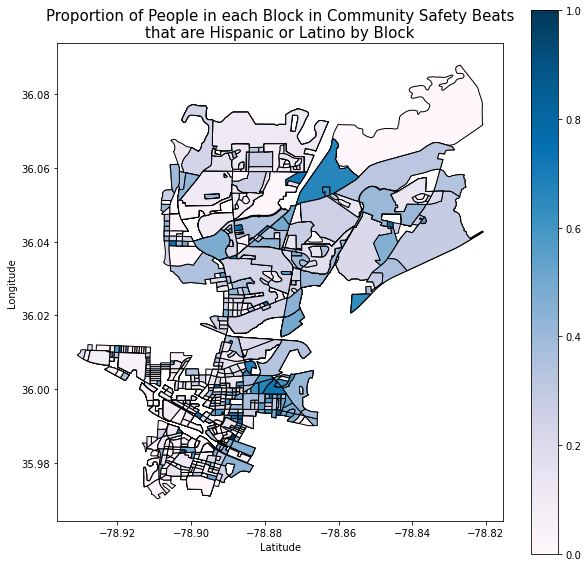

In [1249]:
#Plot choropleth map with Hispanic and block data
fig, ax = plt.subplots(figsize = (10,10))
blockswithhispanics.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1,
                                edgecolor='black');

plt.title("Proportion of People in each Block in Community Safety Beats\nthat are Hispanic or Latino by Block", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

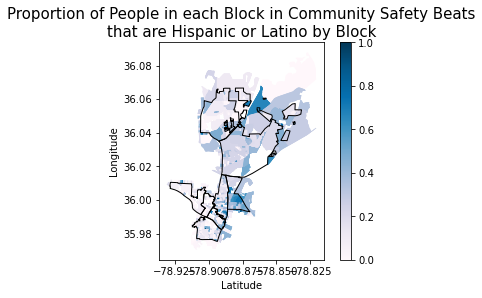

In [48]:
#Filter for community safety beats from policebeats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafebeats = policebeats.loc[policebeats['LAWBEAT'].isin(commsafe_list)].copy()

#Plot choropleth map with Hispanic and block data
# fig, ax = plt.subplots(figsize = (10,10))
ax=blockswithhispanics.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", aspect=1)

commsafebeats.plot(color = 'none', edgecolor = 'black', ax=ax);

plt.title("Proportion of People in each Block in Community Safety Beats\nthat are Hispanic or Latino by Block", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1901]:
#Putting Hispanic data into the police beat and block data
beatswithhispanics = pd.merge(cblockDurhamBeats, hispanicdata, left_on='GEOID20', right_on='geoid20')
popsumbybeat2 = beatswithhispanics.groupby('Beat', as_index=False).sum()
hispanicsineachbeat = pd.merge(popsumbybeat2, policebeats, left_on='Beat', right_on='LAWBEAT')
hispanicsineachbeat = hispanicsineachbeat.to_crs("EPSG:4326")

#Add column for proportion of Hispanic people
hispanicsineachbeat['prophispanic']= hispanicsineachbeat['total_hispanic_or_latino'] / hispanicsineachbeat['total']
hispanicsineachbeat['propnothispanic'] = hispanicsineachbeat['total_not_hispanic_or_latino'] / hispanicsineachbeat['total']

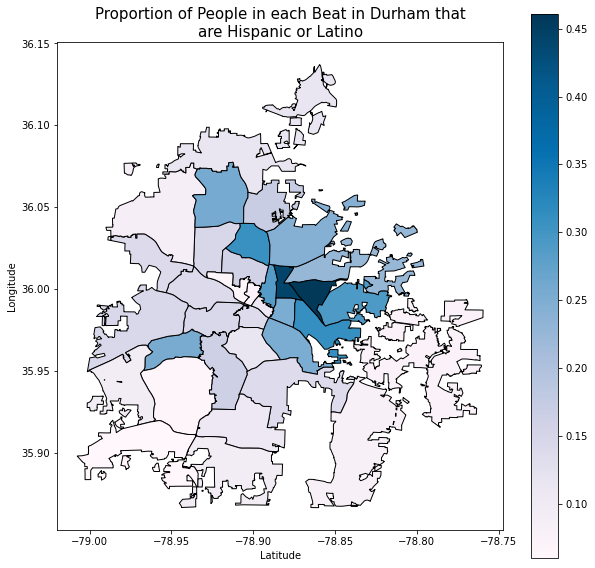

In [1485]:
#Plot choropleth map with Hispanic and beat data
fig, ax = plt.subplots(figsize = (10,10))
hispanicsineachbeat.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1,
                                edgecolor='black');

plt.title("Proportion of People in each Beat in Durham that\nare Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [49]:
#Join Hispanic data and com safe beat data
merge_comsafe_hispanic = pd.merge(cblockcommsafebeats, hispanicdata, left_on='GEOID20', right_on='geoid20')
commsafepopsumbybeat = merge_comsafe_hispanic.groupby('Beat', as_index=False).sum()
hispanic_comsafe_beat = pd.merge(commsafepopsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
hispanic_comsafe_beat = hispanic_comsafe_beat.to_crs("EPSG:4326")

#Find proportion of population that is Hispanic
hispanic_comsafe_beat['prophispanic']= hispanic_comsafe_beat['total_hispanic_or_latino'] / hispanic_comsafe_beat['total']
hispanic_comsafe_beat['propnothispanic']= hispanic_comsafe_beat['total_not_hispanic_or_latino'] / hispanic_comsafe_beat['total']

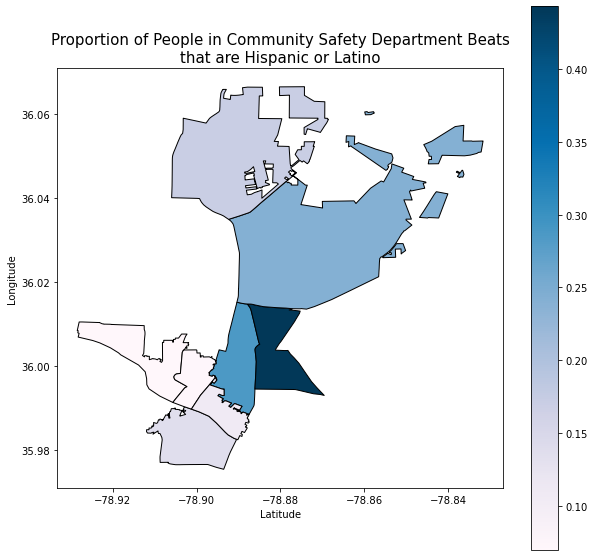

In [1487]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
hispanic_comsafe_beat.plot(column='prophispanic',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of People in Community Safety Department Beats\nthat are Hispanic or Latino", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1478]:
#Filter for all but com safe beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
hispanics_not_comsafebeats = hispanicsineachbeat[~hispanicsineachbeat.Beat.isin(commsafe_list)]
hispanics_not_comsafebeats.head()

Beat   ALAND20  AWATER20  total  total_hispanic_or_latino  \
2   113   2056983      1025   4094                      1038   
3   114   5975063     40919   5631                      1756   
4   121  12440369    123268   8025                      1803   
5   122   3167854      1644   3209                      1478   
6   123   7274612     85253   9036                      2629   

   total_not_hispanic_or_latino  LAWBEAT  \
2                          3056      113   
3                          3875      114   
4                          6222      121   
5                          1731      122   
6                          6407      123   

                                            geometry  OBJECTID     PERIMETER  \
2  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62  20667.539062   
3  MULTIPOLYGON (((-78.83998 35.95407, -78.83974 ...        65  53321.980469   
4  MULTIPOLYGON (((-78.80704 35.99734, -78.80716 ...        38  14495.120117   
5  POLYGON ((-78.84694 36.00614, -78.84634 36.006...        54  36686.679688   
6  MULTIPOLYGON (((-78.83722 36.00417, -78.83717 ...        55  74375.859375   

  STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre    ShapeSTLen  \
2      I        yes      D1  113       None  2.159195e+07  20667.538873   
3      I        yes      D1  114       None  6.103382e+07  53321.974873   
4      I         no      D1  121       None  7.008533e+06  14495.120026   
5      I        yes      D1  122       None  3.436298e+07  36686.681354   
6      I        yes      D1  123       None  7.495698e+07  74375.856455   

   LBeat  id  prophispanic  
2    113   2      0.253542  
3    114   3      0.311845  
4    121   4      0.224673  
5    122   5      0.460580  
6    123   6      0.290947

In [1479]:
#Find proportion of Hispanics not in com safe beats
mean_hispanics_not_comsafe = hispanics_not_comsafebeats[["prophispanic"]].mean()
mean_hispanics_not_comsafe

prophispanic    0.17339
dtype: float64

In [1480]:
#Find the mean proportion of people who are Hispanic in com safe beats
mean_hispanics_comsafe = hispanic_comsafe_beat[["prophispanic"]].mean()
mean_hispanics_not_comsafe

prophispanic    0.17339
dtype: float64

In [1481]:
#Find the mean proportion of people who are Hispanic in all Durham beats
mean_hispanics_durham = hispanic_comsafe_beat[["prophispanic"]].mean()
mean_hispanics_durham

prophispanic    0.190998
dtype: float64

In [1902]:
#Create new data frame that is just proportions for all of Durham
propDurham_hispanic = hispanicsineachbeat[['prophispanic', 'propnothispanic']]

#Change column names
propDurham_hispanic.rename(columns = {'prophispanic':'Hispanic', 'propnothispanic':'Not Hispanic'}, inplace = True)
propDurham_hispanic.head()

Hispanic  Not Hispanic
0  0.286148      0.713852
1  0.443075      0.556925
2  0.253542      0.746458
3  0.311845      0.688155
4  0.224673      0.775327

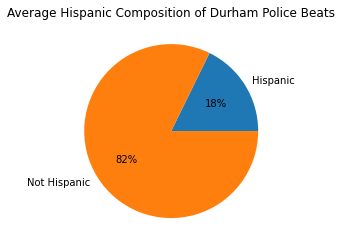

In [1904]:
#Pie chart for proportion of hispanic/non-hispanic in Durham
propDurham_hispanic.mean().plot.pie(ylabel='', title='Average Hispanic Composition of Durham Police Beats', autopct='%1.0f%%');

In [1907]:
#Create new data frame that is just proportions for com safe
propComSafe_hispanic = hispanic_comsafe_beat[['prophispanic', 'propnothispanic']]

#Change column names
propComSafe_hispanic.rename(columns = {'prophispanic':'Hispanic', 'propnothispanic':'Not Hispanic'}, inplace = True)
propComSafe_hispanic.head()

Hispanic  Not Hispanic
0  0.286148      0.713852
1  0.443075      0.556925
2  0.241639      0.758361
3  0.170784      0.829216
4  0.136768      0.863232

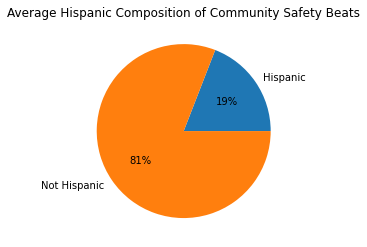

In [1912]:
#Pie chart for proportion of hispanic/non-hispanic in Durham
propComSafe_hispanic.mean().plot.pie(ylabel='', title='Average Hispanic Composition of Community Safety Beats', autopct='%1.0f%%');

In [1967]:
hispanic_beat_props = hispanicsineachbeat[['prophispanic', 'Beat']]
hispanic_beat_props.head()

prophispanic  Beat
0      0.286148   111
1      0.443075   112
2      0.253542   113
3      0.311845   114
4      0.224673   121

In [50]:
#Load in ncblock data from 2010
ncblock2010 = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2010_37_tabblock10/tl_2010_37_tabblock10.shp')
ncblock2010.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10      NAME10  \
0        37        001    020501      2023  370010205012023  Block 2023   
1        37        001    020501      2019  370010205012019  Block 2019   
2        37        001    020501      2038  370010205012038  Block 2038   
3        37        001    020501      2027  370010205012027  Block 2027   
4        37        001    021600      2004  370010216002004  Block 2004   

  MTFCC10 UR10 UACE10 UATYP10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0   G5040    U  11728       U          S    26187         0  +36.1066987   
1   G5040    U  11728       U          S   271479         0  +36.1051544   
2   G5040    U  11728       U          S    26310         0  +36.0996561   
3   G5040    U  11728       U          S    20559         0  +36.1005963   
4   G5040    R   None    None          S  2649779     94190  +36.1475558   

     INTPTLON10                                           geometry  
0  -079.4827258  POLYGON ((-79.48206 36.10593, -79.48228 36.105...  
1  -079.4792253  POLYGON ((-79.47619 36.10063, -79.47618 36.100...  
2  -079.4800868  POLYGON ((-79.48127 36.09908, -79.48128 36.100...  
3  -079.4800661  POLYGON ((-79.47874 36.10013, -79.48128 36.100...  
4  -079.5198629  POLYGON ((-79.52433 36.13833, -79.52448 36.138...

In [51]:
#Set the crs for the 2010 block data
ncblock2010 = ncblock2010.to_crs("EPSG:4326")

In [52]:
#Filter out for blocks only in Durham
durhamblock2010 = ncblock2010[ncblock2010["COUNTYFP10"]=="063"]

In [53]:
#Assign 2010 blocks to current police beats
cblockIndexToBeat10 = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblock2010.index:
    cblock_geom = durhamblock2010.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat10[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats10 = ncblock2010[ncblock2010.index.isin(cblockIndexToBeat10)]
cblockDurhamBeats10['Beat'] = cblockDurhamBeats10.index.map(lambda ii: cblockIndexToBeat10[ii])

warnings.filterwarnings('ignore')

In [54]:
#Load in the data for hispanic/non hispanic from 2010
hispanicdata2010 = pd.read_csv('/Users/sadiesheridan/Desktop/hispanic data 2010/DECENNIALPL2010.P2_data_with_overlays_2022-06-13T103510.csv', skiprows =1)

#Change the geoid to a string 
hispanicdata2010['GEOID20'] = hispanicdata2010['id'].str[-15:]
hispanicdata2010.drop('id', axis=1, inplace=True)

#Drop unnecessary columns
hispanicdata2010.drop(hispanicdata2010.iloc[:, 0:25], inplace = True, axis = 1)
hispanicdata2010.drop(hispanicdata2010.iloc[:, 1:48], inplace = True, axis = 1)

#hispanicdata2010.columns = hispanicdata2010.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hispanicdata2010.rename(columns = {'Total':'total2010'}, inplace = True)
hispanicdata2010

total2010                               Geographic Area Name  \
0                 97  Block 1000, Block Group 1, Census Tract 1.01, ...   
1                 51  Block 1001, Block Group 1, Census Tract 1.01, ...   
2                 38  Block 1002, Block Group 1, Census Tract 1.01, ...   
3                 47  Block 1003, Block Group 1, Census Tract 1.01, ...   
4                 51  Block 1004, Block Group 1, Census Tract 1.01, ...   
...              ...                                                ...   
5025               0  Block 1125, Block Group 1, Census Tract 9801, ...   
5026               0  Block 1126, Block Group 1, Census Tract 9801, ...   
5027               0  Block 1127, Block Group 1, Census Tract 9801, ...   
5028               0  Block 1128, Block Group 1, Census Tract 9801, ...   
5029  267587(r47107)                      Durham County, North Carolina   

              GEOID20  
0     370630001011000  
1     370630001011001  
2     370630001011002  
3     370630001011003  
4     370630001011004  
...               ...  
5025  370639801001125  
5026  370639801001126  
5027  370639801001127  
5028  370639801001128  
5029   0500000US37063  

[5030 rows x 3 columns]

In [55]:
#Merge the 2010 and 2020 hispanic data
hispanicgrowth = pd.merge(hispanicdata2010, hispanicdata, left_on='GEOID20', right_on='geoid20')

#Create a column for the rate of population change
hispanicgrowth['total2010'] = hispanicgrowth['total2010'].astype(int)
hispanicgrowth['percentpopgrowth']= hispanicgrowth['total'] / hispanicgrowth['total2010']
hispanicgrowth.head()

total2010                               Geographic Area Name  \
0         97  Block 1000, Block Group 1, Census Tract 1.01, ...   
1         51  Block 1001, Block Group 1, Census Tract 1.01, ...   
2         38  Block 1002, Block Group 1, Census Tract 1.01, ...   
3         47  Block 1003, Block Group 1, Census Tract 1.01, ...   
4         51  Block 1004, Block Group 1, Census Tract 1.01, ...   

           GEOID20                               geographic_area_name  total  \
0  370630001011000  Block 1000, Block Group 1, Census Tract 1.01, ...    108   
1  370630001011001  Block 1001, Block Group 1, Census Tract 1.01, ...     35   
2  370630001011002  Block 1002, Block Group 1, Census Tract 1.01, ...     38   
3  370630001011003  Block 1003, Block Group 1, Census Tract 1.01, ...     43   
4  370630001011004  Block 1004, Block Group 1, Census Tract 1.01, ...     31   

   total_hispanic_or_latino  total_not_hispanic_or_latino          geoid20  \
0                        25                            83  370630001011000   
1                        12                            23  370630001011001   
2                         8                            30  370630001011002   
3                         0                            43  370630001011003   
4                         7                            24  370630001011004   

   percentpopgrowth  
0          1.113402  
1          0.686275  
2          1.000000  
3          0.914894  
4          0.607843

In [1965]:
#Create new dataframe with just the percent growth, block name, total, and geoid
percentgrowth = hispanicgrowth[['GEOID20', 'percentpopgrowth']]
percentgrowth.head()

GEOID20  percentpopgrowth
0  370630001011000          1.113402
1  370630001011001          0.686275
2  370630001011002          1.000000
3  370630001011003          0.914894
4  370630001011004          0.607843

In [56]:
#Load in the sex by age data from 2010
sexbyage2010 = pd.read_csv('/Users/sadiesheridan/Desktop/SEX BY AGE 2010/DECENNIALSF12010.P12_data_with_overlays_2022-06-09T113835.csv', skiprows =1)

#Change the geoid to a string 
sexbyage2010['GEOID10'] = sexbyage2010['id'].str[-15:]
sexbyage2010.drop('id', axis=1, inplace=True)
sexbyage2010.head()

Total  Total!!Male  Total!!Male!!Under 5 years  Total!!Male!!5 to 9 years  \
0    97           54                           8                          2   
1    51           24                           1                          3   
2    38           23                           3                          1   
3    47           30                           3                          4   
4    51           29                           0                          2   

   Total!!Male!!10 to 14 years  Total!!Male!!15 to 17 years  \
0                            3                            2   
1                            2                            2   
2                            2                            0   
3                            4                            3   
4                            1                            0   

   Total!!Male!!18 and 19 years  Total!!Male!!20 years  Total!!Male!!21 years  \
0                             4                      2                      1   
1                             0                      0                      0   
2                             0                      0                      0   
3                             3                      0                      1   
4                             1                      2                      1   

   Total!!Male!!22 to 24 years  Total!!Male!!25 to 29 years  \
0                            0                            7   
1                            0                            3   
2                            0                            2   
3                            1                            2   
4                            4                            4   

   Total!!Male!!30 to 34 years  Total!!Male!!35 to 39 years  \
0                            8                            2   
1                            3                            1   
2                            4                            5   
3                            3                            2   
4                            1                            3   

   Total!!Male!!40 to 44 years  Total!!Male!!45 to 49 years  \
0                            3                            5   
1                            2                            1   
2                            2                            0   
3                            2                            1   
4                            3                            2   

   Total!!Male!!50 to 54 years  Total!!Male!!55 to 59 years  \
0                            2                            2   
1                            3                            1   
2                            0                            3   
3                            0                            0   
4                            1                            2   

   Total!!Male!!60 and 61 years  Total!!Male!!62 to 64 years  \
0                             0                            0   
1                             0                            0   
2                             0                            1   
3                             0                            0   
4                             0                            0   

   Total!!Male!!65 and 66 years  Total!!Male!!67 to 69 years  \
0                             1                            1   
1                             0                            0   
2                             0                            0   
3                             1                            0   
4                             0                            0   

   Total!!Male!!70 to 74 years  Total!!Male!!75 to 79 years  \
0                            1                            0   
1                            1                            1   
2                            0                            0   
3                            0                            0   
4                            0                            1 

In [57]:
#Putting age data into the police beat data
beats_age = pd.merge(cblockDurhamBeats10, sexbyage2010, on='GEOID10')
popsumbybeat3 = beats_age.groupby('Beat', as_index=False).sum()
ageineachbeat = pd.merge(popsumbybeat3, policebeats, left_on='Beat', right_on='LAWBEAT')
ageineachbeat = ageineachbeat.to_crs("EPSG:4326")

In [58]:
#Add total column
ageineachbeat['total'] = ageineachbeat['Total!!Female'] + ageineachbeat['Total!!Male']

In [59]:
#Creating new columns for age groups
ageineachbeat['Children 0 to 14']=ageineachbeat.iloc[:,4:7].sum(axis=1) + ageineachbeat.iloc[:,28:31].sum(axis=1)
ageineachbeat['Young Adults 15 to 24']=ageineachbeat.iloc[:,7:12].sum(axis=1) + ageineachbeat.iloc[:,31:36].sum(axis=1)
ageineachbeat['Adults 25 to 64']=ageineachbeat.iloc[:,12:21].sum(axis=1) + ageineachbeat.iloc[:,36:45].sum(axis=1)
ageineachbeat['Seniors 65+']=ageineachbeat.iloc[:,21:27].sum(axis=1) + ageineachbeat.iloc[:,45:51].sum(axis=1)

#Creating new columns for proportions
ageineachbeat['Proportion of Children'] = ageineachbeat['Children 0 to 14'] / ageineachbeat['total']
ageineachbeat['Proportion of Young Adults'] = ageineachbeat['Young Adults 15 to 24'] / ageineachbeat['total']
ageineachbeat['Proportion of Adults'] = ageineachbeat['Adults 25 to 64'] / ageineachbeat['total']
ageineachbeat['Proportion of Seniors'] = ageineachbeat['Seniors 65+'] / ageineachbeat['total']

ageineachbeat.head()

Beat   ALAND10  AWATER10  Total!!Male  Total!!Male!!Under 5 years  \
0   111   1896763         0         1935                         195   
1   112   1924624         0         1446                         139   
2   113   2049536      1025         1711                         150   
3   114   6903356     47606         2512                         246   
4   121  13390023    148787         3151                         334   

   Total!!Male!!5 to 9 years  Total!!Male!!10 to 14 years  \
0                        139                          122   
1                        120                           97   
2                        130                          118   
3                        217                          193   
4                        352                          288   

   Total!!Male!!15 to 17 years  Total!!Male!!18 and 19 years  \
0                           72                            52   
1                           54                            33   
2                           77                            59   
3                          140                            87   
4                          177                            92   

   Total!!Male!!20 years  Total!!Male!!21 years  Total!!Male!!22 to 24 years  \
0                     39                     33                          111   
1                     27                     23                           79   
2                     19                     18                           94   
3                     34                     31                          119   
4                     47                     35                           89   

   Total!!Male!!25 to 29 years  Total!!Male!!30 to 34 years  \
0                          174                          144   
1                          115                          137   
2                          124                          135   
3                          196                          214   
4                          243                          304   

   Total!!Male!!35 to 39 years  Total!!Male!!40 to 44 years  \
0                          141                          144   
1                          120                          115   
2                          119                          126   
3                          191                          179   
4                          299                          239   

   Total!!Male!!45 to 49 years  Total!!Male!!50 to 54 years  \
0                          117                          130   
1                          116                           81   
2                          169                          138   
3                          168                          134   
4                          178                          164   

   Total!!Male!!55 to 59 years  Total!!Male!!60 and 61 years  \
0                          121                            34   
1                           69                            17   
2                          100                            25   
3                          113                            55   
4                          115                            36   

   Total!!Male!!62 to 64 years  Total!!Male!!65 and 66 years  \
0                           46                            26   
1                           25                            12   
2                           33                            18   
3                           43                            24   
4                           41                            17   

   Total!!Male!!67 to 69 years  Total!!Male!!70 to 74 years  \
0                           23                           42   
1                           19                           16   
2                           16                           13   
3                           27                           39   
4                           24                           34   

   Total!!Male!!75 to 79 years  Total!!Male!!80 to 

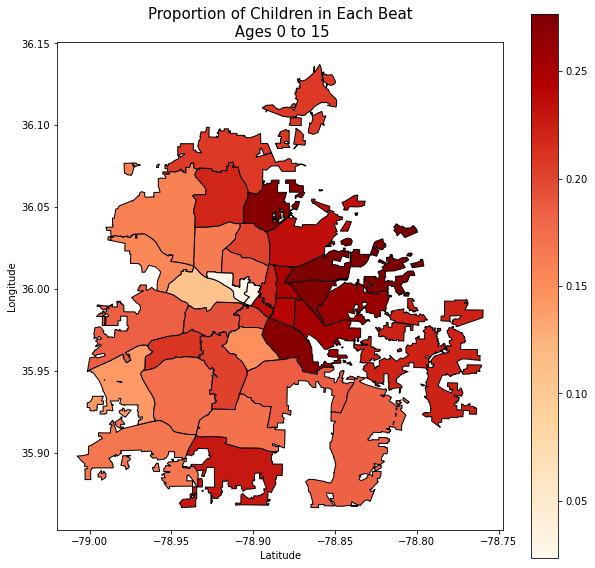

In [1838]:
#Plot a choropleth map for proportion of children in each beat
fig, ax = plt.subplots(figsize = (10,10))
ageineachbeat.plot(column='Proportion of Children',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor='black');

plt.title("Proportion of Children in Each Beat\n Ages 0 to 15", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

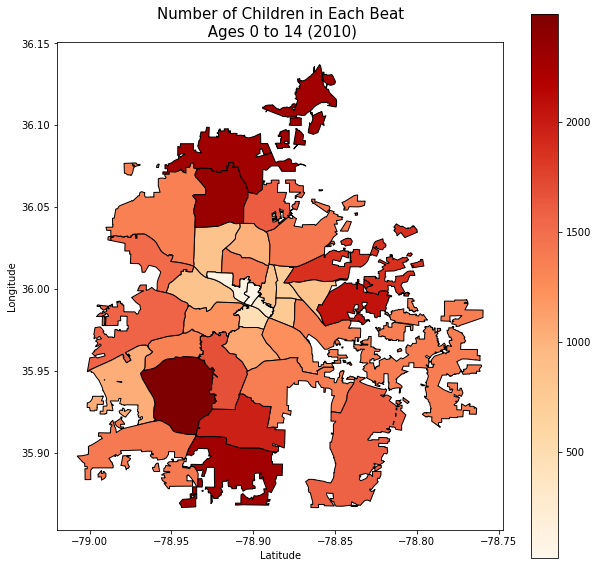

In [1841]:
#Plot a choropleth map for number of children in each beat
fig, ax = plt.subplots(figsize = (10,10))
ageineachbeat.plot(column='Children 0 to 14',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor='black');

plt.title("Number of Children in Each Beat\n Ages 0 to 14 (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

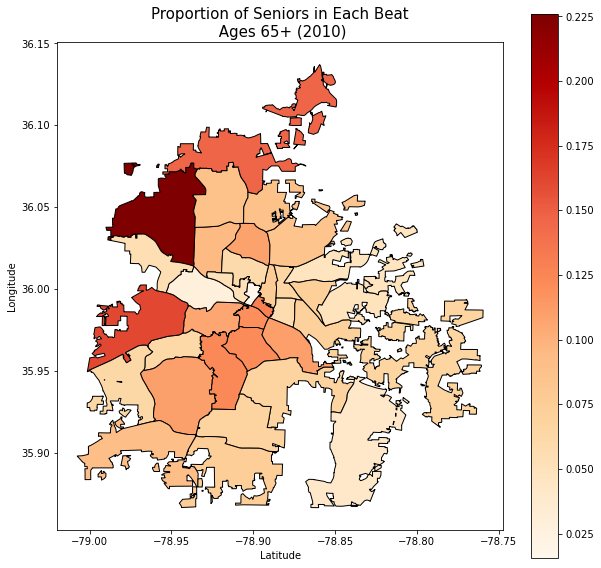

In [1842]:
#Plot a choropleth map for proportion of seniors in each beat
fig, ax = plt.subplots(figsize = (10,10))
ageineachbeat.plot(column='Proportion of Seniors',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor='black');

plt.title("Proportion of Seniors in Each Beat\n Ages 65+ (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1846]:
#Only for community safety beats now
commsafe_list=[511, 512, 513, 411, 111, 112, 214, 223]
commsafe_list=list(commsafe_list)
age_comsafe = ageineachbeat.loc[ageineachbeat['Beat'].isin(commsafe_list)].copy()
age_comsafe

Beat   ALAND10  AWATER10  Total!!Male  Total!!Male!!Under 5 years  \
0    111   1896763         0         1935                         195   
1    112   1924624         0         1446                         139   
11   214  12242639    129441         2908                         223   
14   223   7544005     14993         2516                         294   
24   411   1984885       757         1171                          90   
32   511   2027401         0         1931                          22   
33   512    880217         0          587                           4   
34   513    799774         0          496                          38   

    Total!!Male!!5 to 9 years  Total!!Male!!10 to 14 years  \
0                         139                          122   
1                         120                           97   
11                        252                          271   
14                        271                          243   
24                         67                           82   
32                         13                            8   
33                          3                            3   
34                         37                           45   

    Total!!Male!!15 to 17 years  Total!!Male!!18 and 19 years  \
0                            72                            52   
1                            54                            33   
11                          158                           119   
14                          171                            70   
24                           35                            34   
32                           12                           871   
33                           22                            43   
34                           28                             8   

    Total!!Male!!20 years  Total!!Male!!21 years  Total!!Male!!22 to 24 years  \
0                      39                     33                          111   
1                      27                     23                           79   
11                     64                     37                          109   
14                     32                     33                          100   
24                     23                     17                           53   
32                     50                     75                          151   
33                     32                     24                           62   
34                      4                      4                           22   

    Total!!Male!!25 to 29 years  Total!!Male!!30 to 34 years  \
0                           174                          144   
1                           115                          137   
11                          174                          213   
14                          206                          189   
24                           80                           70   
32                          268                          160   
33                           85                           67   
34                           31                           35   

    Total!!Male!!35 to 39 years  Total!!Male!!40 to 44 years  \
0                           141                          144   
1                           120                          115   
11                          212                          193   
14                          177                          136   
24                           83                           67   
32                           66                           45   
33                           77                           53   
34                           26                           24   

    Total!!Male!!45 to 49 years  Total!!Male!!50 to 54 years  \
0                           117                          130   
1                           116                           81   
11                          242                          175   
14                          149                          129 

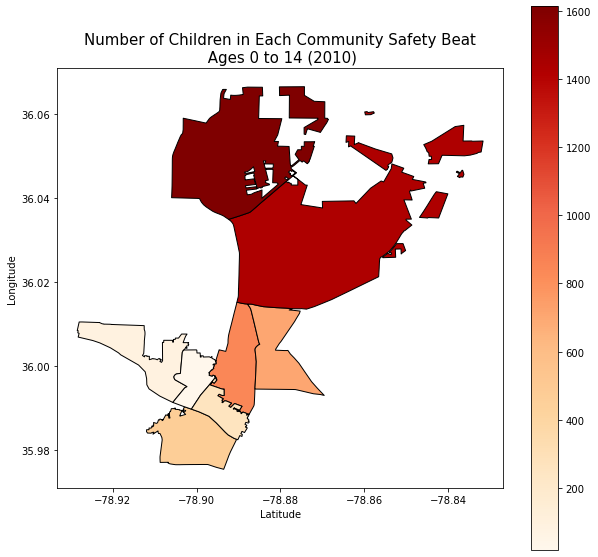

In [1847]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
age_comsafe.plot(column='Children 0 to 14',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Number of Children in Each Community Safety Beat\n Ages 0 to 14 (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

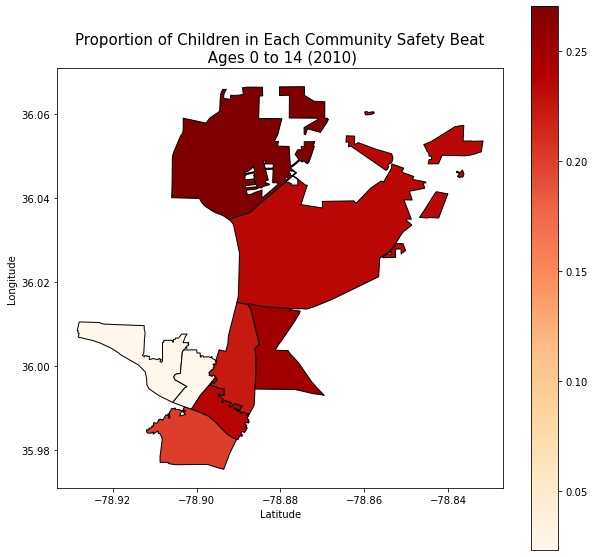

In [1851]:
#Plot choropleth map with merged data for proportion of children
fig, ax = plt.subplots(figsize = (10,10))
age_comsafe.plot(column='Proportion of Children',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Children in Each Community Safety Beat\n Ages 0 to 14 (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

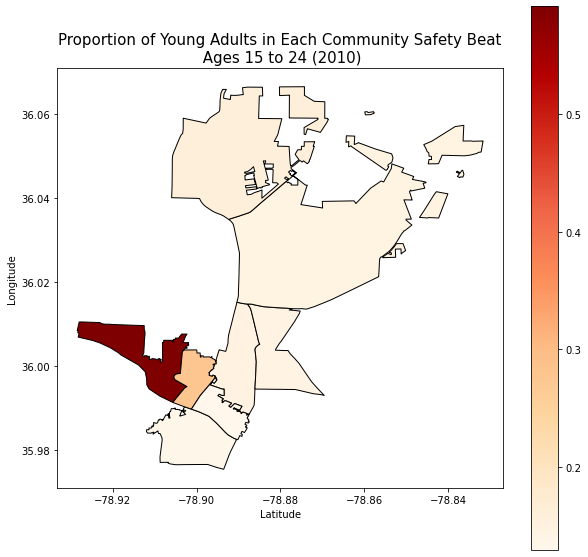

In [1850]:
#Plot choropleth map with merged data for proportion of Young Adults
fig, ax = plt.subplots(figsize = (10,10))
age_comsafe.plot(column='Proportion of Young Adults',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Young Adults in Each Community Safety Beat\n Ages 15 to 24 (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

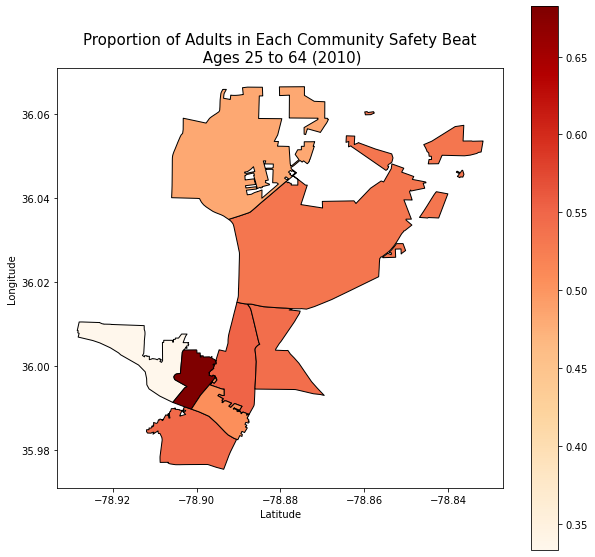

In [1852]:
#Plot choropleth map with merged data for proportion of adults
fig, ax = plt.subplots(figsize = (10,10))
age_comsafe.plot(column='Proportion of Adults',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Adults in Each Community Safety Beat\n Ages 25 to 64 (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

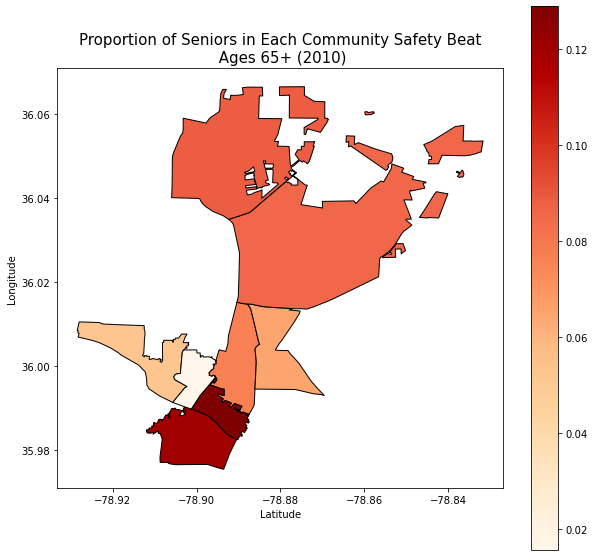

In [1853]:
#Plot choropleth map with merged data for proportion of seniors
fig, ax = plt.subplots(figsize = (10,10))
age_comsafe.plot(column='Proportion of Seniors',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Seniors in Each Community Safety Beat\n Ages 65+ (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

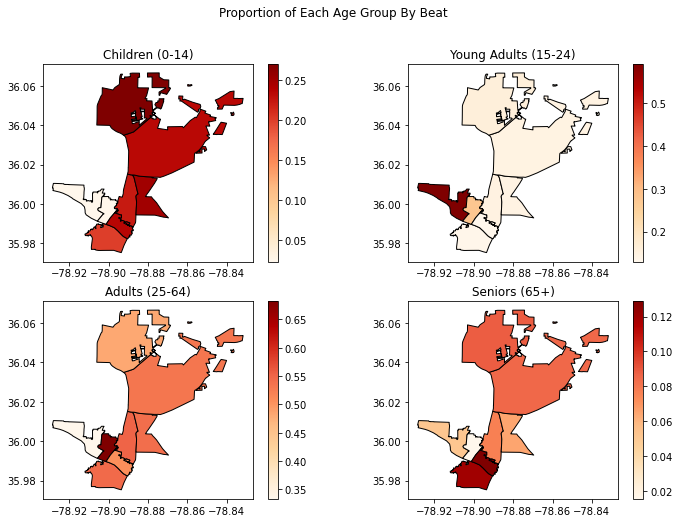

: 

In [2028]:
#Plot subplots of racial data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]
ax11.title.set_text('Children (0-14)')
ax12.title.set_text('Young Adults (15-24)')
ax21.title.set_text('Adults (25-64)')
ax22.title.set_text('Seniors (65+)')

# Set figure title
fig.suptitle("Proportion of Each Age Group By Beat")

#Plot subplots
age_comsafe.plot(column='Proportion of Children',
                                legend=True,
                                cmap="OrRd", ax=ax11, aspect=1, edgecolor='black');

age_comsafe.plot(column='Proportion of Young Adults',
                                legend=True,
                                cmap="OrRd", ax=ax12, aspect=1, edgecolor='black');

age_comsafe.plot(column='Proportion of Adults',
                                legend=True,
                                cmap="OrRd", ax=ax21, aspect=1, edgecolor='black');

age_comsafe.plot(column='Proportion of Seniors',
                                legend=True,
                                cmap="OrRd", ax=ax22, aspect=1, edgecolor='black');

plt.show()

In [1921]:
#Print the proportions of each age group per beat
ageprops = age_comsafe[['Proportion of Seniors', 'Proportion of Adults', 'Proportion of Young Adults', 'Proportion of Children', 'Beat']].copy()
ageprops = ageprops.drop_duplicates()
ageprops.sort_values(by='Proportion of Seniors', inplace=True, ascending=False)
ageprops

Proportion of Seniors  Proportion of Adults  Proportion of Young Adults  \
34               0.128829              0.505405                    0.129730   
24               0.119282              0.545960                    0.134673   
14               0.088378              0.482475                    0.158645   
11               0.085288              0.533705                    0.146794   
0                0.076862              0.552034                    0.148442   
1                0.065064              0.541018                    0.144272   
32               0.051746              0.333418                    0.591384   
33               0.015625              0.682292                    0.277344   

    Proportion of Children  Beat  
34                0.236036   513  
24                0.200086   411  
14                0.270501   223  
11                0.234214   214  
0                 0.222662   111  
1                 0.249646   112  
32                0.023451   511  
33                0.024740   512

In [61]:
#Filter out policebeats for community safety beats only
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
policebeatscomm = policebeats[policebeats['LAWBEAT'].isin(commsafe_list)]
policebeatscomm.head()

LAWBEAT                                           geometry  OBJECTID  \
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1       112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
11      214  MULTIPOLYGON (((-78.85254 36.02879, -78.85254 ...        23   
14      223  MULTIPOLYGON (((-78.89380 36.06589, -78.89372 ...        21   
24      411  POLYGON ((-78.90125 35.98965, -78.89941 35.988...        67   

       PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0   28608.800781      I        yes      D1  111       None  2.010252e+07   
1   26265.849609      I        yes      D1  112       None  2.079934e+07   
11   1715.291016      I         no      D2  214       None  1.329736e+05   
14  16095.400391      I         no      D2  223       None  6.891411e+06   
24  24141.640625      I        yes      D4  411       None  2.140812e+07   

      ShapeSTLen  LBeat  id  
0   28608.799743    111   0  
1   26265.852604    112   1  
11   1715.290848    214  11  
14  16095.395041    223  14  
24  24141.641318    411  24

In [62]:
#Merge the call data with com safe police beats
comsafe_calls = gpd.sjoin(policebeatscomm, dpdcalls)

In [63]:
#Join all calls with beatracewithcalls
calls_per_person = beatracewithcalls.set_index('lawbeat').join(allcalls.set_index('LAWBEAT'))
calls_per_person['callsperperson']= calls_per_person['calls_count'] / calls_per_person['total_']
calls_per_person.head()

geometry  objectid  \
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   

        perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   

       shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   

     total_population_of_one_race_white_alone  \
111                                      1242   
111                                      1242   
111                                      1242   
111                                      1242   
111                                      1242   

     total_population_of_one_race_black_or_african_american_alone  \
111                                               1487              
111                                               1487              
111                                               1487              
111                                               1487              
111                                               1487              

     total_population_of_one_race_american_indian_and_alaska_native_alone  \
111                                                 91                      
111                                                 91                      
111                                                 91                      
111                                                 91                      
111                                                 91                      

     total_population_of_one_race_asian_alone  \
111                                        73   
111                                        73   
111                                        73   
111                                        73   
111                                        73   

     total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
111                                                  3                               
111                                                  3                               
111                                                  3                               
111                                                  3                               
111                                                  3                               

     total_population_of_one_race_some_other_race_alone  \
111                                                643    
111                                                643    
111                                                643    
111                                                643    
111                                                643    

     total_population_of_two_or_more_races_  \
111                                     410   
111                                     410   
111                                     410   
111                                     410   
111                                     410   

     total_population_of_two_or_more_races_population_of_two_races_  \
111              

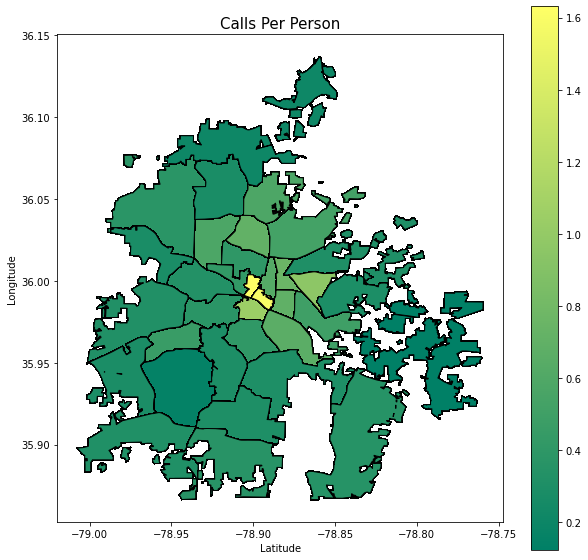

In [1857]:
#Plot choropleth map for calls per person
fig, ax = plt.subplots(figsize = (10,10))
calls_per_person.plot(column='callsperperson',
                                legend=True,
                                cmap="summer", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Calls Per Person", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [64]:
highestcalls_durham = calls_per_person[['callsperperson']].copy()
highestcalls_durham = highestcalls_durham.drop_duplicates()
highestcalls_durham.sort_values(by='callsperperson', inplace=True, ascending=False)
highestcalls_durham.head()

callsperperson
512        1.631227
513        1.584973
411        1.047225
122        0.956684
112        0.757055

In [65]:
#Filter out calls_per_person for just com safe beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
calls_per_person_comsafe = calls_per_person[calls_per_person['beat'].isin(commsafe_list)]
calls_per_person_comsafe.head()

geometry  objectid  \
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   

        perimeter status contiguous lawdist  cad gis_dataa1    shapestare  \
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   
111  28608.800781      I        yes      D1  111       None  2.010252e+07   

       shapestlen  lbeat  id  beat  total_  total_population_of_one_race_  \
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   
111  28608.799743    111   0   111    3949                           3539   

     total_population_of_one_race_white_alone  \
111                                      1242   
111                                      1242   
111                                      1242   
111                                      1242   
111                                      1242   

     total_population_of_one_race_black_or_african_american_alone  \
111                                               1487              
111                                               1487              
111                                               1487              
111                                               1487              
111                                               1487              

     total_population_of_one_race_american_indian_and_alaska_native_alone  \
111                                                 91                      
111                                                 91                      
111                                                 91                      
111                                                 91                      
111                                                 91                      

     total_population_of_one_race_asian_alone  \
111                                        73   
111                                        73   
111                                        73   
111                                        73   
111                                        73   

     total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone  \
111                                                  3                               
111                                                  3                               
111                                                  3                               
111                                                  3                               
111                                                  3                               

     total_population_of_one_race_some_other_race_alone  \
111                                                643    
111                                                643    
111                                                643    
111                                                643    
111                                                643    

     total_population_of_two_or_more_races_  \
111                                     410   
111                                     410   
111                                     410   
111                                     410   
111                                     410   

     total_population_of_two_or_more_races_population_of_two_races_  \
111              

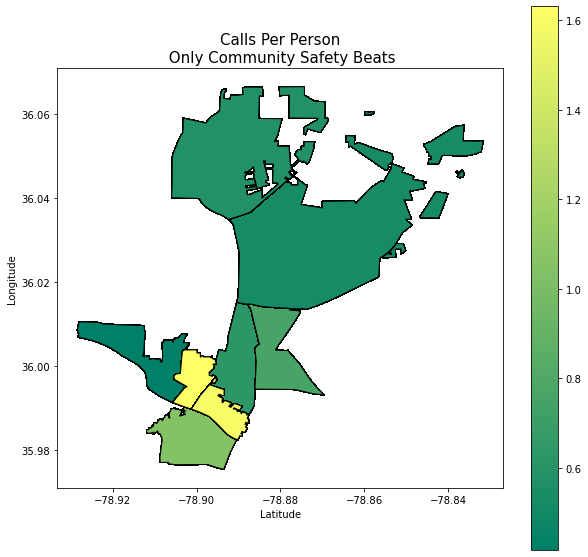

In [1859]:
#Plot choropleth map for calls per person in community safety beats
fig, ax = plt.subplots(figsize = (10,10))
calls_per_person_comsafe.plot(column='callsperperson',
                                legend=True,
                                cmap="summer", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Calls Per Person\n Only Community Safety Beats", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [66]:
#Print table for top beats with highest number of calls per person
highestcalls = calls_per_person_comsafe[['callsperperson']].copy()
highestcalls = highestcalls.drop_duplicates()
highestcalls.sort_values(by='callsperperson', inplace=True, ascending=False)
highestcalls.head()

callsperperson
512        1.631227
513        1.584973
411        1.047225
112        0.757055
111        0.627247

In [67]:
#Load in the Household Size data
householdsize = pd.read_csv('/Users/sadiesheridan/Desktop/Household Size 2010/DECENNIALSF12010.P17_data_with_overlays_2022-06-14T111441.csv', skiprows=1)

#Change the geoid to a string 
householdsize['GEOID10'] = householdsize['id'].str[-15:]
householdsize.drop('id', axis=1, inplace=True)

In [1634]:
#Putting age data into the police beat data
beats_householdsize = pd.merge(cblockDurhamBeats10, householdsize, on='GEOID10')
popsumbybeat4 = beats_householdsize.groupby('Beat', as_index=False).mean()
householdsize_ineachbeat = pd.merge(popsumbybeat4, policebeats, left_on='Beat', right_on='LAWBEAT')
householdsize_ineachbeat = householdsize_ineachbeat.to_crs("EPSG:4326")
householdsize_ineachbeat.head()

Beat        ALAND10     AWATER10  Average household size!!Total  \
0   111   19965.926316     0.000000                       2.584947   
1   112   40096.333333     0.000000                       2.125833   
2   113   23831.813953    11.918605                       2.428372   
3   114   67679.960784   466.725490                       1.956961   
4   121  108861.975610  1209.650407                       2.033740   

   Average household size!!Total!!Under 18 years  \
0                                       0.654947   
1                                       0.609792   
2                                       0.735116   
3                                       0.579020   
4                                       0.630488   

   Average household size!!Total!!18 years and over  LAWBEAT  \
0                                          1.929895      111   
1                                          1.516875      112   
2                                          1.694070      113   
3                                          1.377745      114   
4                                          1.403902      121   

                                            geometry  OBJECTID     PERIMETER  \
0  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50  28608.800781   
1  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51  26265.849609   
2  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62  20667.539062   
3  MULTIPOLYGON (((-78.83998 35.95407, -78.83974 ...        65  53321.980469   
4  MULTIPOLYGON (((-78.80704 35.99734, -78.80716 ...        38  14495.120117   

  STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre    ShapeSTLen  \
0      I        yes      D1  111       None  2.010252e+07  28608.799743   
1      I        yes      D1  112       None  2.079934e+07  26265.852604   
2      I        yes      D1  113       None  2.159195e+07  20667.538873   
3      I        yes      D1  114       None  6.103382e+07  53321.974873   
4      I         no      D1  121       None  7.008533e+06  14495.120026   

   LBeat  id  
0    111   0  
1    112   1  
2    113   2  
3    114   3  
4    121   4

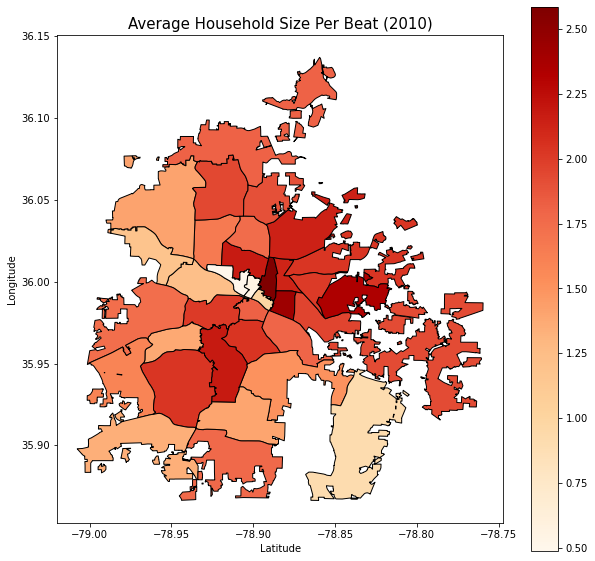

In [1635]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
householdsize_ineachbeat.plot(column='Average household size!!Total',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Average Household Size Per Beat (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1636]:
#Only for community safety beats now
commsafe_list=[511, 512, 513, 411, 111, 112, 214, 223]
commsafe_list=list(commsafe_list)
householdsize_comsafe = householdsize_ineachbeat.loc[householdsize_ineachbeat['LAWBEAT'].isin(commsafe_list)]
householdsize_comsafe

Beat        ALAND10     AWATER10  Average household size!!Total  \
0    111   19965.926316     0.000000                       2.584947   
1    112   40096.333333     0.000000                       2.125833   
11   214  118860.572816  1256.708738                       2.137961   
14   223  100586.733333   199.906667                       1.897733   
24   411   23629.583333     9.011905                       1.817143   
32   511   29814.720588     0.000000                       0.488824   
33   512   17604.340000     0.000000                       0.553800   
34   513   13789.206897     0.000000                       0.981724   

    Average household size!!Total!!Under 18 years  \
0                                        0.654947   
1                                        0.609792   
11                                       0.589709   
14                                       0.593867   
24                                       0.428095   
32                                       0.052500   
33                                       0.093000   
34                                       0.361724   

    Average household size!!Total!!18 years and over  LAWBEAT  \
0                                           1.929895      111   
1                                           1.516875      112   
11                                          1.547864      214   
14                                          1.304000      223   
24                                          1.390238      411   
32                                          0.436029      511   
33                                          0.460600      512   
34                                          0.620172      513   

                                             geometry  OBJECTID     PERIMETER  \
0   POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50  28608.800781   
1   POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51  26265.849609   
11  MULTIPOLYGON (((-78.85254 36.02880, -78.85253 ...        23   1715.291016   
14  MULTIPOLYGON (((-78.89372 36.06586, -78.89365 ...        21  16095.400391   
24  POLYGON ((-78.90125 35.98965, -78.89941 35.988...        67  24141.640625   
32  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53  32615.019531   
33  POLYGON ((-78.90313 36.00376, -78.90298 36.003...        57  16338.889648   
34  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61  20647.179688   

   STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre    ShapeSTLen  \
0       I        yes      D1  111       None  2.010252e+07  28608.799743   
1       I        yes      D1  112       None  2.079934e+07  26265.852604   
11      I         no      D2  214       None  1.329736e+05   1715.290848   
14      I         no      D2  223       None  6.891411e+06  16095.395041   
24      I        yes      D4  411       None  2.140812e+07  24141.641318   
32      I        yes      D5  511       None  2.129644e+07  32615.017763   
33      I        yes      D5  512       None  9.305014e+06  16338.888321   
34      I        yes      D5  513       None  9.114313e+06  20647.175971   

    LBeat  id  
0     111   0  
1     112   1  
11    214  11  
14    223  14  
24    411  24  
32    511  32  
33    512  33  
34    513  34

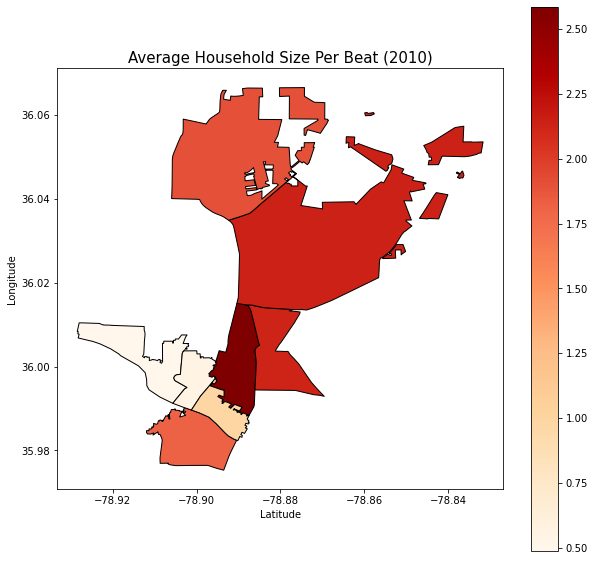

In [1637]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
householdsize_comsafe.plot(column='Average household size!!Total',
                                legend=True,
                                cmap="OrRd", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Average Household Size Per Beat (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [2027]:
#Household size table
householdsize_table = householdsize_ineachbeat[['Beat', 'Average household size!!Total']]
householdsize_table.head()

Beat  Average household size!!Total
0   111                       2.584947
1   112                       2.125833
2   113                       2.428372
3   114                       1.956961
4   121                       2.033740

In [69]:
#Load in homeowner age data
homeownerdata = pd.read_csv('/Users/sadiesheridan/Desktop/Homeowner Age 2010/DECENNIALSF12010.H18_data_with_overlays_2022-06-14T141309.csv', skiprows=1)

#Change the geoid to a string 
homeownerdata['GEOID10'] = homeownerdata['id'].str[-15:]
homeownerdata.drop('id', axis=1, inplace=True)
homeownerdata.head()

Total  Total!!Owner occupied  Total!!Owner occupied!!Family households  \
0     34                     11                                         6   
1     18                     13                                         8   
2     15                      7                                         2   
3     10                      6                                         6   
4     17                     12                                         6   

   Total!!Owner occupied!!Family households!!Husband-wife family  \
0                                                  4               
1                                                  6               
2                                                  1               
3                                                  4               
4                                                  4               

   Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 15 to 34 years  \
0                                                  1                                           
1                                                  1                                           
2                                                  0                                           
3                                                  1                                           
4                                                  0                                           

   Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 35 to 64 years  \
0                                                  3                                           
1                                                  3                                           
2                                                  1                                           
3                                                  2                                           
4                                                  4                                           

   Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 65 years and over  \
0                                                  0                                              
1                                                  2                                              
2                                                  0                                              
3                                                  1                                              
4                                                  0                                              

   Total!!Owner occupied!!Family households!!Other family  \
0                                                  2        
1                                                  2        
2                                                  1        
3                                                  2        
4                                                  2        

   Total!!Owner occupied!!Family households!!Other family!!Male householder, no wife present  \
0                                                  0                                           
1                                                  0                                           
2                                                  1                                           
3                                                  1                                           
4                                                  1                                           

   Total!!Owner occupied!!Family households!!Other family!!Male householder, no wife present!!Householder 15 to 34 years  \
0                                                  0                                                                       
1                                                  0                                                                       
2                                                  0              

In [70]:
#Putting age data into the police beat data
beats_homeowner = pd.merge(cblockDurhamBeats10, homeownerdata, on='GEOID10')
popsumbybeat4 = beats_homeowner.groupby('Beat', as_index=False).sum()
homeowner = pd.merge(popsumbybeat4, policebeats, left_on='Beat', right_on='LAWBEAT')
homeowner = homeowner.to_crs("EPSG:4326")
homeowner.head()

Beat   ALAND10  AWATER10  Total  Total!!Owner occupied  \
0   111   1896763         0   1472                    398   
1   112   1924624         0   1044                    206   
2   113   2049536      1025   1048                    291   
3   114   6903356     47606   2024                   1016   
4   121  13390023    148787   2350                   1899   

   Total!!Owner occupied!!Family households  \
0                                       218   
1                                       117   
2                                       172   
3                                       642   
4                                      1408   

   Total!!Owner occupied!!Family households!!Husband-wife family  \
0                                                129               
1                                                 61               
2                                                 84               
3                                                387               
4                                                939               

   Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 15 to 34 years  \
0                                                 22                                           
1                                                  7                                           
2                                                  8                                           
3                                                 65                                           
4                                                269                                           

   Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 35 to 64 years  \
0                                                 89                                           
1                                                 39                                           
2                                                 62                                           
3                                                259                                           
4                                                606                                           

   Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 65 years and over  \
0                                                 18                                              
1                                                 15                                              
2                                                 14                                              
3                                                 63                                              
4                                                 64                                              

   Total!!Owner occupied!!Family households!!Other family  \
0                                                 89        
1                                                 56        
2                                                 88        
3                                                255        
4                                                469        

   Total!!Owner occupied!!Family households!!Other family!!Male householder, no wife present  \
0                                                 16                                           
1                                                 19                                           
2                                                 19                                           
3                                                 48                                           
4                                                 67                                           

   Total!!Owner occupied!!Family households!!Other family!!Male householder, no wife present!!Householder 15 to 34 years  \
0                                                  4                                                                       
1  

In [71]:
#Add proportion columns for homeowner data
homeowner['Proportion of Renters'] = homeowner['Total!!Renter occupied'] / homeowner['Total']
homeowner['Proportion of Homeowners'] = homeowner['Total!!Owner occupied'] / homeowner['Total']
homeowner['Proportion of Homeowners that are Families'] = homeowner['Total!!Owner occupied!!Family households'] / homeowner['Total!!Owner occupied']
homeowner['Proportion of Renters that are Families'] = homeowner['Total!!Renter occupied!!Family households'] / homeowner['Total!!Renter occupied']

Text(50.25, 0.5, 'Longitude')

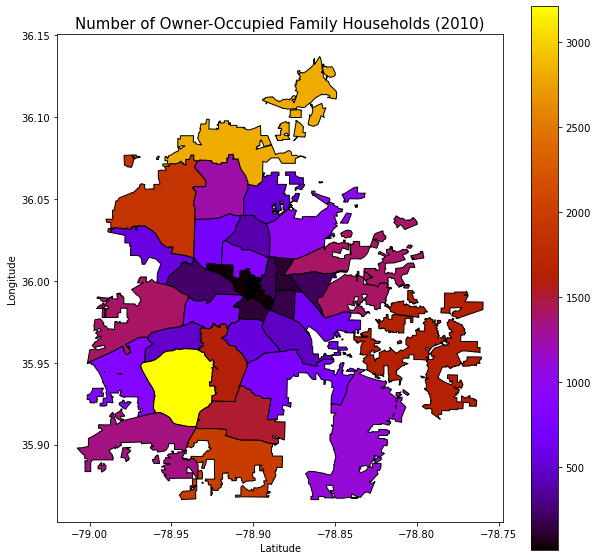

In [1642]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
homeowner.plot(column='Total!!Owner occupied!!Family households',
                                legend=True,
                                cmap="gnuplot", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Number of Owner-Occupied Family Households (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [1643]:
#Only for community safety beats now
commsafe_list=[511, 512, 513, 411, 111, 112, 214, 223]
commsafe_list=list(commsafe_list)
homeowner_comsafe = homeowner.loc[homeowner['Beat'].isin(commsafe_list)].copy()
homeowner_comsafe

Beat   ALAND10  AWATER10  Total  Total!!Owner occupied  \
0    111   1896763         0   1472                    398   
1    112   1924624         0   1044                    206   
11   214  12242639    129441   2125                   1422   
14   223   7544005     14993   2299                    800   
24   411   1984885       757    979                    262   
32   511   2027401         0   1141                     87   
33   512    880217         0    111                     42   
34   513    799774         0    437                     44   

    Total!!Owner occupied!!Family households  \
0                                        218   
1                                        117   
11                                       978   
14                                       542   
24                                       135   
32                                        36   
33                                        14   
34                                        29   

    Total!!Owner occupied!!Family households!!Husband-wife family  \
0                                                 129               
1                                                  61               
11                                                576               
14                                                325               
24                                                 49               
32                                                 31               
33                                                  8               
34                                                 12               

    Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 15 to 34 years  \
0                                                  22                                           
1                                                   7                                           
11                                                 81                                           
14                                                 75                                           
24                                                  3                                           
32                                                 12                                           
33                                                  0                                           
34                                                  1                                           

    Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 35 to 64 years  \
0                                                  89                                           
1                                                  39                                           
11                                                407                                           
14                                                218                                           
24                                                 28                                           
32                                                 18                                           
33                                                  6                                           
34                                                 11                                           

    Total!!Owner occupied!!Family households!!Husband-wife family!!Householder 65 years and over  \
0                                                  18                                              
1                                                  15                                              
11                                                 88                                              
14                                                 32                                              
24                                                 18                                              
32                                        

Text(50.25, 0.5, 'Longitude')

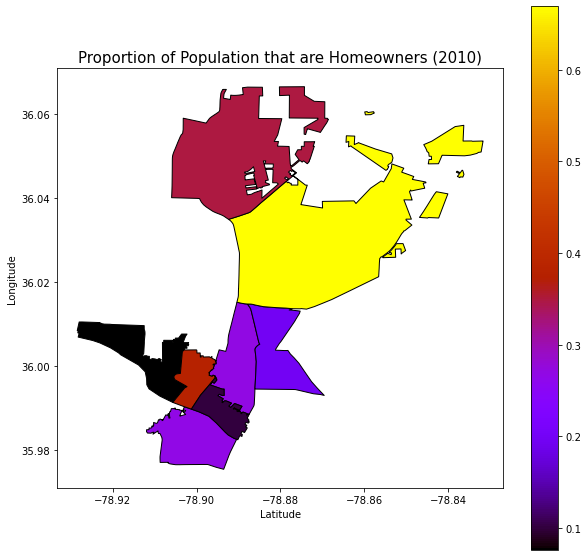

In [1644]:
#Plot choropleth map with com safe data
fig, ax = plt.subplots(figsize = (10,10))
homeowner_comsafe.plot(column='Proportion of Homeowners',
                                legend=True,
                                cmap="gnuplot", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Population that are Homeowners (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(50.25, 0.5, 'Longitude')

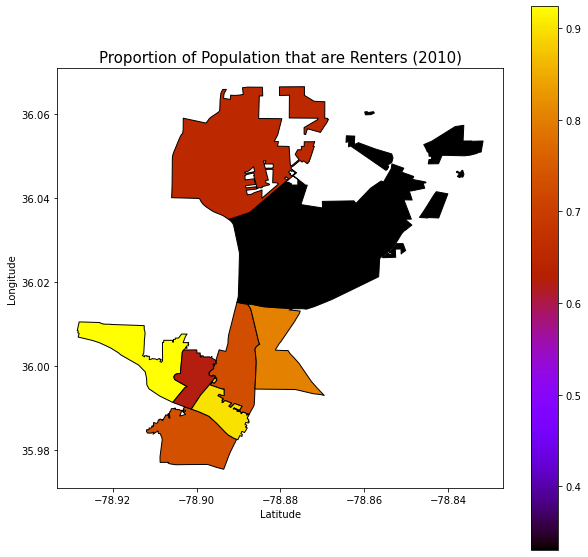

In [1645]:
#Plot choropleth map with com safe data
fig, ax = plt.subplots(figsize = (10,10))
homeowner_comsafe.plot(column='Proportion of Renters',
                                legend=True,
                                cmap="gnuplot", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Population that are Renters (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(50.25, 0.5, 'Longitude')

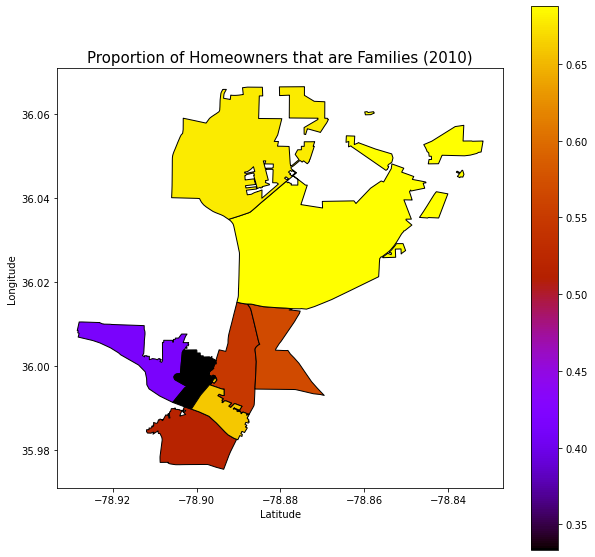

In [1646]:
#Plot choropleth map with com safe data
fig, ax = plt.subplots(figsize = (10,10))
homeowner_comsafe.plot(column='Proportion of Homeowners that are Families',
                                legend=True,
                                cmap="gnuplot", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Homeowners that are Families (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(50.25, 0.5, 'Longitude')

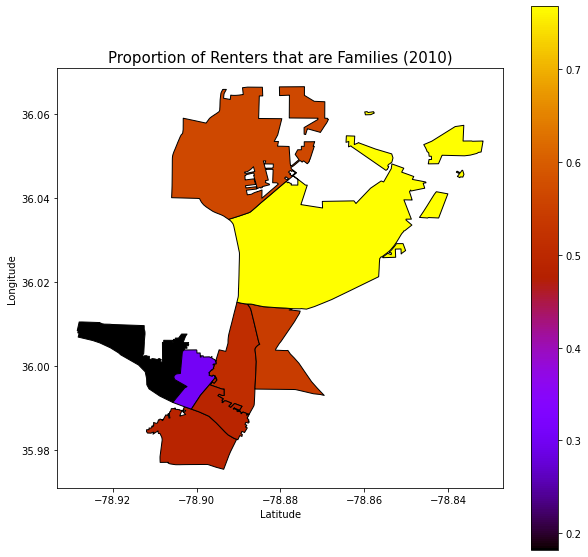

In [1647]:
#Plot choropleth map with com safe data
fig, ax = plt.subplots(figsize = (10,10))
homeowner_comsafe.plot(column='Proportion of Renters that are Families',
                                legend=True,
                                cmap="gnuplot", ax=ax, aspect=1,
                                edgecolor="black");

plt.title("Proportion of Renters that are Families (2010)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [1920]:
#Print proportions of each beat that are renters or homeowners
homeownerprops = homeowner_comsafe[['Proportion of Renters', 'Proportion of Homeowners', 'Beat']].copy()
homeownerprops = homeownerprops.drop_duplicates()
homeownerprops.sort_values(by='Proportion of Renters', inplace=True, ascending=False)
homeownerprops

Proportion of Renters  Proportion of Homeowners  Beat
32               0.923751                  0.076249   511
34               0.899314                  0.100686   513
1                0.802682                  0.197318   112
24               0.732380                  0.267620   411
0                0.729620                  0.270380   111
14               0.652023                  0.347977   223
33               0.621622                  0.378378   512
11               0.330824                  0.669176   214

In [74]:
#Load in block group shapefile from 2015
ncblockgroupmap = gpd.read_file('/Users/sadiesheridan/Desktop/2015blockgroupshapefile/tl_2015_37_bg.shp')
ncblockgroupmap = ncblockgroupmap.to_crs("EPSG:4326")
ncblockgroupmap.head(1)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      37      021  002401        2  370210024012  Block Group 2  G5030   

  FUNCSTAT     ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  15365558       0  +35.5219587  -082.7467767   

                                            geometry  
0  POLYGON ((-82.78041 35.52550, -82.78006 35.525...

In [75]:
#Filter nc map for Durham county
durhamblockgroupmap = ncblockgroupmap[ncblockgroupmap["COUNTYFP"]=="063"]

In [76]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockgroupmap.index:
    cblock_geom = durhamblockgroupmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeatsbg = ncblockgroupmap[ncblockgroupmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeatsbg['Beat'] = cblockDurhamBeatsbg.index.map(lambda ii: cblockIndexToBeat[ii])
warnings.filterwarnings('ignore')

In [77]:
#Load in household income data
householdincomedata = pd.read_csv('/Users/sadiesheridan/Desktop/householdincomedata/householdincome.csv', skiprows =1)

#Edit geoid and drop columns
householdincomedata['GEOID'] = householdincomedata['id'].str[-12:]
householdincomedata.drop('id', axis=1, inplace=True)
householdincomedata = householdincomedata.drop(householdincomedata.filter(regex='Margin').columns, axis=1)
householdincomedata = householdincomedata.drop(householdincomedata.filter(regex='Not computed').columns, axis=1)
householdincomedata = householdincomedata.drop(householdincomedata.filter(regex='30.0 percent').columns, axis=1)

#Rename columns
householdincomedata.rename(columns=lambda s: s.replace("Estimate!!Total", "Total"), inplace=True)
householdincomedata.rename(columns=lambda s: s.replace("!!", " "), inplace=True)
householdincomedata.rename(columns = {'Total':'Total Homeowners'}, inplace = True)
householdincomedata = householdincomedata[['GEOID', 'Geographic Area Name', 'Total Homeowners', 'Total Less than $10,000', 'Total $10,000 to $19,999', 'Total $20,000 to $34,999', 'Total $35,000 to $49,999', 'Total $50,000 to $74,999', 'Total $75,000 to $99,999', 'Total $100,000 or more']]
householdincomedata.head()

GEOID                               Geographic Area Name  \
0  370010201001  Block Group 1, Census Tract 201, Alamance Coun...   
1  370010201002  Block Group 2, Census Tract 201, Alamance Coun...   
2  370010201003  Block Group 3, Census Tract 201, Alamance Coun...   
3  370010201004  Block Group 4, Census Tract 201, Alamance Coun...   
4  370010202001  Block Group 1, Census Tract 202, Alamance Coun...   

   Total Homeowners  Total Less than $10,000  Total $10,000 to $19,999  \
0               338                       26                        57   
1               501                       10                        41   
2                35                       11                         0   
3                12                        0                         0   
4               211                       21                         0   

   Total $20,000 to $34,999  Total $35,000 to $49,999  \
0                        56                        26   
1                        21                        60   
2                         0                        24   
3                         0                        12   
4                       168                         8   

   Total $50,000 to $74,999  Total $75,000 to $99,999  Total $100,000 or more  
0                        66                        45                      62  
1                       123                       135                     111  
2                         0                         0                       0  
3                         0                         0                       0  
4                         5                         0                       9

In [78]:
#Merge income data with cblockDurhamBeats10
income_byblocks = pd.merge(cblockDurhamBeatsbg, householdincomedata, left_on ='GEOID', right_on='GEOID')
income_byblocks.drop(['MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'TRACTCE', 'STATEFP'], axis=1, inplace=True)
income_byblocks.head()

COUNTYFP BLKGRPCE         GEOID       NAMELSAD     INTPTLAT      INTPTLON  \
0      063        4  370630017074  Block Group 4  +36.0599754  -078.9557502   
1      063        1  370630020191  Block Group 1  +35.9028449  -078.9763172   
2      063        1  370630020201  Block Group 1  +35.8836714  -078.9598590   
3      063        2  370630018082  Block Group 2  +35.9604800  -078.8131335   
4      063        1  370630020241  Block Group 1  +35.9367893  -078.9298792   

                                            geometry  Beat  \
0  POLYGON ((-78.97803 36.05933, -78.97783 36.059...   221   
1  POLYGON ((-78.98414 35.91174, -78.98394 35.911...   324   
2  POLYGON ((-78.97849 35.86682, -78.97764 35.867...   324   
3  POLYGON ((-78.84684 35.96561, -78.84617 35.965...   124   
4  POLYGON ((-78.94473 35.92757, -78.94471 35.927...   322   

                                Geographic Area Name  Total Homeowners  \
0  Block Group 4, Census Tract 17.07, Durham Coun...               634   
1  Block Group 1, Census Tract 20.19, Durham Coun...               190   
2  Block Group 1, Census Tract 20.20, Durham Coun...               639   
3  Block Group 2, Census Tract 18.08, Durham Coun...              1168   
4  Block Group 1, Census Tract 20.24, Durham Coun...              1374   

   Total Less than $10,000  Total $10,000 to $19,999  \
0                       14                        78   
1                       15                         0   
2                        0                         0   
3                        0                        30   
4                        8                         0   

   Total $20,000 to $34,999  Total $35,000 to $49,999  \
0                        43                       105   
1                        17                        18   
2                         0                        19   
3                        87                        52   
4                        74                       137   

   Total $50,000 to $74,999  Total $75,000 to $99,999  Total $100,000 or more  
0                        90                        99                     205  
1                         0                        17                     123  
2                        49                        65                     506  
3                       219                       214                     566  
4                       163                       216                     776

In [84]:
#Grouping the income_byblocks by beat
incomesum = income_byblocks.groupby('Beat', as_index=False).sum()
incomesum.head()

Beat  Total Homeowners  Total Less than $10,000  Total $10,000 to $19,999  \
0   111               414                       40                        70   
1   112               329                       23                        35   
2   113               363                       16                        88   
3   114              1289                       95                       172   
4   121              1849                       68                        44   

   Total $20,000 to $34,999  Total $35,000 to $49,999  \
0                        97                        35   
1                        63                       103   
2                        42                       108   
3                       295                       158   
4                        94                       315   

   Total $50,000 to $74,999  Total $75,000 to $99,999  Total $100,000 or more  
0                        61                        65                      46  
1                        31                        49                      25  
2                        74                        16                      19  
3                       258                       200                     111  
4                       491                       559                     278

In [85]:
#Find the total number of homeowners
incomesum['Total Homeowners'].sum()

54256

In [86]:
#Adding columns to group income levels
incomesum['lowincome']= incomesum['Total Less than $10,000'] + incomesum['Total $10,000 to $19,999'] + incomesum['Total $20,000 to $34,999']
incomesum['middleincome']= incomesum['Total $35,000 to $49,999'] + incomesum['Total $50,000 to $74,999'] + incomesum['Total $75,000 to $99,999']
incomesum['prop_low_homeowners']= incomesum['lowincome'] / incomesum['Total Homeowners']
incomesum['prop_middle_homeowners']= incomesum['middleincome'] / incomesum['Total Homeowners']
incomesum['prop_upper_homeowners']= incomesum['Total $100,000 or more'] / incomesum['Total Homeowners']
incomesum.head()

Beat  Total Homeowners  Total Less than $10,000  Total $10,000 to $19,999  \
0   111               414                       40                        70   
1   112               329                       23                        35   
2   113               363                       16                        88   
3   114              1289                       95                       172   
4   121              1849                       68                        44   

   Total $20,000 to $34,999  Total $35,000 to $49,999  \
0                        97                        35   
1                        63                       103   
2                        42                       108   
3                       295                       158   
4                        94                       315   

   Total $50,000 to $74,999  Total $75,000 to $99,999  Total $100,000 or more  \
0                        61                        65                      46   
1                        31                        49                      25   
2                        74                        16                      19   
3                       258                       200                     111   
4                       491                       559                     278   

   lowincome  middleincome  prop_low_homeowners  prop_middle_homeowners  \
0        207           161             0.500000                0.388889   
1        121           183             0.367781                0.556231   
2        146           198             0.402204                0.545455   
3        562           616             0.435997                0.477890   
4        206          1365             0.111412                0.738237   

   prop_upper_homeowners  
0               0.111111  
1               0.075988  
2               0.052342  
3               0.086113  
4               0.150352

In [89]:
homeownerincome = pd.merge(policebeats, incomesum, left_on ='LAWBEAT', right_on='Beat')
homeownerincome.head()

LAWBEAT                                           geometry  OBJECTID  \
0      111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1      112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
2      113  POLYGON ((-78.87372 35.99369, -78.87458 35.991...        62   
3      114  MULTIPOLYGON (((-78.84053 35.95436, -78.84021 ...        65   
4      121  MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...        38   

      PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0  28608.800781      I        yes      D1  111       None  2.010252e+07   
1  26265.849609      I        yes      D1  112       None  2.079934e+07   
2  20667.539062      I        yes      D1  113       None  2.159195e+07   
3  53321.980469      I        yes      D1  114       None  6.103382e+07   
4  14495.120117      I         no      D1  121       None  7.008533e+06   

     ShapeSTLen  LBeat  id  Beat  Total Homeowners  Total Less than $10,000  \
0  28608.799743    111   0   111               414                       40   
1  26265.852604    112   1   112               329                       23   
2  20667.538873    113   2   113               363                       16   
3  53321.974873    114   3   114              1289                       95   
4  14495.120026    121   4   121              1849                       68   

   Total $10,000 to $19,999  Total $20,000 to $34,999  \
0                        70                        97   
1                        35                        63   
2                        88                        42   
3                       172                       295   
4                        44                        94   

   Total $35,000 to $49,999  Total $50,000 to $74,999  \
0                        35                        61   
1                       103                        31   
2                       108                        74   
3                       158                       258   
4                       315                       491   

   Total $75,000 to $99,999  Total $100,000 or more  lowincome  middleincome  \
0                        65                      46        207           161   
1                        49                      25        121           183   
2                        16                      19        146           198   
3                       200                     111        562           616   
4                       559                     278        206          1365   

   prop_low_homeowners  prop_middle_homeowners  prop_upper_homeowners  
0             0.500000                0.388889               0.111111  
1             0.367781                0.556231               0.075988  
2             0.402204                0.545455               0.052342  
3             0.435997                0.477890               0.086113  
4             0.111412                0.738237               0.150352

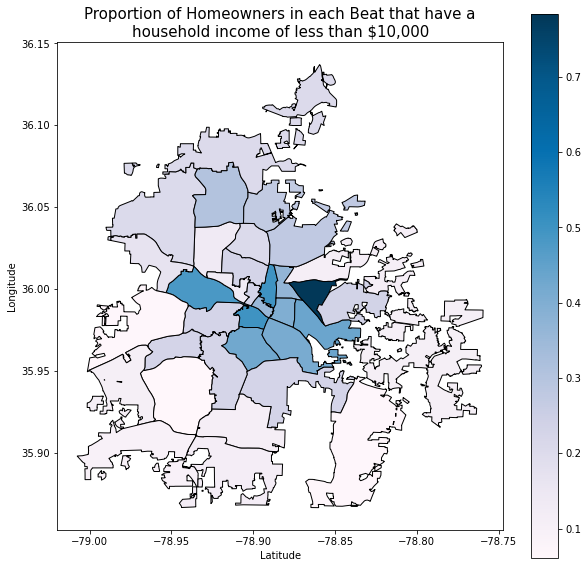

In [158]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
homeownerincome.plot(column='prop_low_homeowners',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

plt.title("Proportion of Homeowners in each Beat that have a\nhousehold income of less than $10,000", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

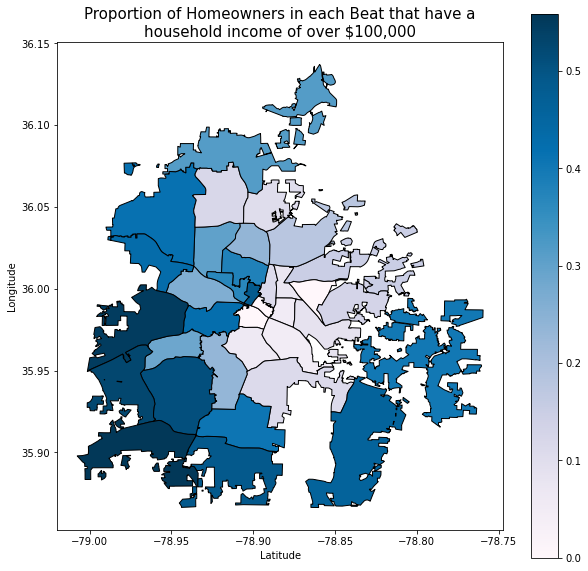

In [163]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
homeownerincome.plot(column='prop_upper_homeowners',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

plt.title("Proportion of Homeowners in each Beat that have a\nhousehold income of over $100,000", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [94]:
#Only for community safety beats now
commsafe_list=[511, 512, 513, 411, 111, 112, 214, 223]
commsafe_list=list(commsafe_list)
income_comsafe = homeownerincome.loc[homeownerincome['Beat'].isin(commsafe_list)].copy()
income_comsafe

LAWBEAT                                           geometry  OBJECTID  \
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
1       112  POLYGON ((-78.88787 36.01473, -78.88734 36.014...        51   
11      214  MULTIPOLYGON (((-78.85254 36.02879, -78.85254 ...        23   
14      223  MULTIPOLYGON (((-78.89380 36.06589, -78.89372 ...        21   
24      411  POLYGON ((-78.90125 35.98965, -78.89941 35.988...        67   
32      511  POLYGON ((-78.92318 36.01031, -78.92260 36.010...        53   
33      512  POLYGON ((-78.90313 36.00376, -78.90298 36.003...        57   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   

       PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_DataA1    ShapeSTAre  \
0   28608.800781      I        yes      D1  111       None  2.010252e+07   
1   26265.849609      I        yes      D1  112       None  2.079934e+07   
11   1715.291016      I         no      D2  214       None  1.329736e+05   
14  16095.400391      I         no      D2  223       None  6.891411e+06   
24  24141.640625      I        yes      D4  411       None  2.140812e+07   
32  32615.019531      I        yes      D5  511       None  2.129644e+07   
33  16338.889648      I        yes      D5  512       None  9.305014e+06   
34  20647.179688      I        yes      D5  513       None  9.114313e+06   

      ShapeSTLen  LBeat  id  Beat  Total Homeowners  Total Less than $10,000  \
0   28608.799743    111   0   111               414                       40   
1   26265.852604    112   1   112               329                       23   
11   1715.290848    214  11   214              1970                       33   
14  16095.395041    223  14   223               278                       24   
24  24141.641318    411  24   411               156                       24   
32  32615.017763    511  32   511                87                        0   
33  16338.888321    512  33   512               197                        0   
34  20647.175971    513  34   513               124                        0   

    Total $10,000 to $19,999  Total $20,000 to $34,999  \
0                         70                        97   
1                         35                        63   
11                       231                       283   
14                         0                        51   
24                         5                        49   
32                         0                        11   
33                        20                        25   
34                         0                        44   

    Total $35,000 to $49,999  Total $50,000 to $74,999  \
0                         35                        61   
1                        103                        31   
11                       286                       572   
14                        60                        69   
24                        21                        43   
32                         0                        18   
33                        34                         2   
34                        62                        18   

    Total $75,000 to $99,999  Total $100,000 or more  lowincome  middleincome  \
0                         65                      46        207           161   
1                         49                      25        121           183   
11                       216                     349        547          1074   
14                        45                      29         75           174   
24                        14                       0         78            78   
32                        26                      32         11            44   
33                        20                      96         45            56   
34                         0                       0         44            80   

    prop_low_homeowners  prop_middle_homeowners  prop_upper_homeowners  
0              0.500000                0.388889               0.

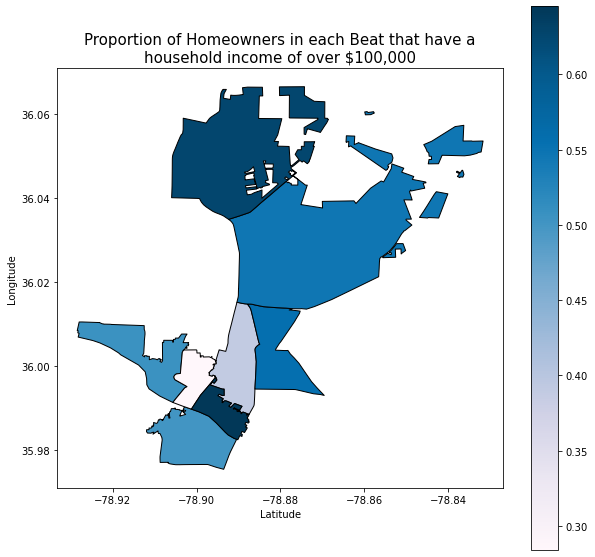

In [160]:
#Plot choropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
income_comsafe.plot(column='prop_middle_homeowners',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1, edgecolor = 'black');

plt.title("Proportion of Homeowners in each Beat that have a\nhousehold income of over $100,000", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

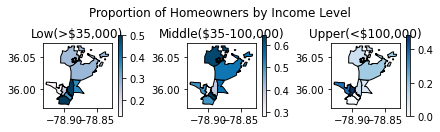

In [162]:
#Plot subplots of income
fig = plt.figure(constrained_layout=True)

gridspan = fig.add_gridspec(1, 1)
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax1.title.set_text('Low(>$35,000)')
ax2.title.set_text('Middle($35-100,000)')
ax3.title.set_text('Upper(<$100,000)')

# Set figure title
fig.suptitle("Proportion of Homeowners by Income Level")

#Plot subplots
income_comsafe.plot(column='prop_low_homeowners',
                                legend=True,
                                cmap="PuBu", ax=ax1, aspect=1, edgecolor='black');

income_comsafe.plot(column='prop_middle_homeowners',
                                legend=True,
                                cmap="PuBu", ax=ax2, aspect=1, edgecolor='black');

income_comsafe.plot(column='prop_upper_homeowners',
                                legend=True,
                                cmap="Blues", ax=ax3, aspect=1, edgecolor='black');

plt.show()